# EXECUTIVE SUMMARY

1. Optimum Machine Model Chosen: 
2. Accuracy Score: 
3. Cross Validation Score: 
4. Final Accuracy Score(After Hyperparamter Tunning): 
5. RMSE:
6. Key Operations executed: Exploratory Data Analysis(EDA), Data Preprocessing(Univariate,Bivariate,Multivariate), Metrics Measurement, Model Execution and Hyperparameter Tunning

# PROJECT CONTENTS
- Problem Statement
- Domain Knowledge
- Step 1: Attributes of Variables
- Step 2: LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS
     - 2.1:Import all necessary libraries
     - 2.2:Load Dataset
     - 2.3:Descriptive Analysis
     - 2.4:Observations
- Step 3: Exploratory Data Analysis
     - 3.1:Encoding
     - 3.2:Normal Distribution Check(Univariate Analysis)
     - 3.3:Scatter Plot Check(Bivariate Analysis)
     - 3.4:Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis
     - 3.5:Outlier Check
     - 3.6:Skewness Check
     - 3.7:Categorical Variable(s) Check
- Step 4: DATA PREPROCESSING
     - 4.1:Removal of Duplicates
     - 4.2:Dropping of Features that strongly promotes multicollinearity(VIF)
     - 4.3:Removal of Outliers
     - 4.4:Transforming Data to Remove Skewness using Power transformation
     - 4.5:Seperating the datasets into X and Y variables
- Step 5: MODEL BUILDING
     - 5.1:Linear Regression
     - 5.2:RandomForest Regressor
     - 5.3:AdaBoost Regressor
     - 5.4:GradientBoosting Regressor
     - 5.5:XGBoost Regressor
     - 5.6:ExtraTrees Regressor
     - 5.7:Support Vector Regressor(SVR)
- Step 6:COMPARING ALL MACHINE LEARNING MODELS
     - 6.1:Comparing Differences between Accuracy and Cross_Validation Scores...
     - 6.2:Conclusion on Choice of Model
- Step 7:HYPERPARAMETER TUNNING
- Step 8:MODEL SAVING

# PROBLEM STATEMENT(Census project)

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

# Domain Knowledge
This is critical stage in any machine learning process. It involves brainstorming and coming up with as many hypothesis as possible about what could affect the target variable. It facilitates in exploring the data at hand more efficiently and effectively. Domain Knowledge should be done before seeing the data or else we will end up with biased hypotheses. Below are some anticipated assertions on the problem statement.

- Unique identifiers does not impact sales
- Sales are higher during weekends.
- Higher sales during morning and late evening.
- Higher sales during festive periods.
- Store size affects the sales.
- Location of the store affects the sales.
- Items with more shelf space sell more.

# Step 1 - ATTRIBUTES OF VARIABLES

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

    A single cell estimate of the population 16+ for each state.

    Controls for Hispanic Origin by age and sex.

    Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Step 2 - IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS

# Step 2.1 - Import all necessary libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,power_transform,PowerTransformer,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve,mean_squared_error,mean_absolute_error
from scipy.stats import zscore
from collections import Counter
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


import warnings
warnings.filterwarnings('ignore')

# Step 2.2 - Load Dataset

In [7]:
#Load dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
#checking the first five rows
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [9]:
#checking the last five rows
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [10]:
#picking 4 random samples
df.sample(4)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
17503,39,Private,28572,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,48,United-States,<=50K
23123,43,Self-emp-not-inc,73883,Bachelors,13,Divorced,Sales,Unmarried,White,Male,0,0,45,United-States,<=50K
11853,51,Local-gov,35211,Masters,14,Married-civ-spouse,Prof-specialty,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
16638,39,Private,435638,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K


# Step 2.3 - Data Descriptive Analysis

In [11]:
#checking the data shape
df.shape

(32560, 15)

In [12]:
#checking for nature of datatypes
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [13]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
#Checking data description for all numerical columns
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
#Checking data description for all non-numerical columns
numerics = ['int8','int16','int32','int64','float16','float32','float64']#enlisiting and storing possible data types of continuous data. This means any continuous data MUST have any of this type of data type
categorical_columns=[]#initializing an emty list
features = df.columns.values.tolist()#Pulling all the features(columns) of the dataset and storing in features
for col in features:#col is the iterating variable
    if df[col].dtype in numerics:
        continue
    categorical_columns.append(col)
df[categorical_columns].describe()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


In [16]:
#lets check the columns
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [17]:
#Checking for null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [18]:
#Checking for null values
df.isnull().sum().sum()

0

In [19]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [20]:
#Checking the content of each Categorical columns
print("The Value Counts in Workclass - ",Counter(df['Workclass']))
print("The Value Counts in Education - ",Counter(df['Education']))
print("The Value Counts in Marital_status - ",Counter(df['Marital_status']))
print("The Value Counts in Occupation - ",Counter(df['Occupation']))
print("The Value Counts in Relationship - ",Counter(df['Relationship']))
print("The Value Counts in Race - ",Counter(df['Race']))
print("The Value Counts in Native_country - ",Counter(df['Native_country']))
print("The Value Counts in Income - ",Counter(df['Income']))

The Value Counts in Workclass -  Counter({' Private': 22696, ' Self-emp-not-inc': 2541, ' Local-gov': 2093, ' ?': 1836, ' State-gov': 1297, ' Self-emp-inc': 1116, ' Federal-gov': 960, ' Without-pay': 14, ' Never-worked': 7})
The Value Counts in Education -  Counter({' HS-grad': 10501, ' Some-college': 7291, ' Bachelors': 5354, ' Masters': 1723, ' Assoc-voc': 1382, ' 11th': 1175, ' Assoc-acdm': 1067, ' 10th': 933, ' 7th-8th': 646, ' Prof-school': 576, ' 9th': 514, ' 12th': 433, ' Doctorate': 413, ' 5th-6th': 333, ' 1st-4th': 168, ' Preschool': 51})
The Value Counts in Marital_status -  Counter({' Married-civ-spouse': 14976, ' Never-married': 10682, ' Divorced': 4443, ' Separated': 1025, ' Widowed': 993, ' Married-spouse-absent': 418, ' Married-AF-spouse': 23})
The Value Counts in Occupation -  Counter({' Prof-specialty': 4140, ' Craft-repair': 4099, ' Exec-managerial': 4066, ' Adm-clerical': 3769, ' Sales': 3650, ' Other-service': 3295, ' Machine-op-inspct': 2002, ' ?': 1843, ' Transpor

In [21]:
#Checking the content of each Categorical columns
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [22]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [23]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [24]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [25]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [26]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [27]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [28]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [29]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [30]:
df.shape

(32560, 15)

# Step 2.4 - Observations


# The Train Dataset is made up of;
- 32560 rows and 15 columns
- 14 features and 1 Target

# Description of Features:
1. Age: 
- It is made up of Categorical data
- It has 1559 factors; FDW13,FDG33,NCY18,FDD38,DRE49 etc 
- It has no null values
- Its Datatype is an Object type

2. Workclass:
- It is made up of Continuos data
- It has null values to the tune of 1463
- Its Datatype is an floating type

3. Fnlwgt:
- It is made up of Categorical data
- It has 5 factors; Low Fat(5089), Regular(2889), LF(316), reg(117), low fat(112)
- It has no null values
- Its Datatype is an Object type

4. Education:
- It is made up of Continuos data
- It has no null values
- Its Datatype is an floating type

5. Education_num: 
- It is made up of Categorical data
- It has 16 factors; Fruits and Vegetables(1232), nack Foods(1200), Household(910), Frozen Foods(856), Dairy(682), Canned(649)                        Baking Goods(648), Health and Hygiene(520),Soft Drinks(445), Meat(425), Breads(251), Hard Drinks(214),                          Others(169), Starchy Foods(148),Breakfast(110),Seafood(64)
- It has no null values
- Its Datatype is an Object type

6. Marital_status:
- It is made up of Continuos data
- It has no null values
- Its Datatype is an floating type

7. Occupation: 
- It is made up of Categorical data
- It has 10 factors; OUT027(935), OUT013(932), OUT049(930), OUT046(930), OUT035(930), OUT045(929), OUT018(928), OUT017(926)
                     OUT010(555), OUT019(528)
- It has no null values
- Its Datatype is an Object type

8. Relationship:
- It is made up of Continuos data
- It has no null values
- Its Datatype is an interger type

9. Race: 
- It is made up of Categorical data
- It has 3 factors; Medium(2793), Small(2388), High(932)
- It has null values to the tune of 2410
- Its Datatype is an Object type

10. Sex: 
- It is made up of Categorical data
- It has 3 factors; Tier 3(3350), Tier 2(2785), Tier 1(238)
- It has no null values
- Its Datatype is an Object type

11. Capital_gain:
- It is made up of Categorical data
- It has 4 factors; Supermarket Type1(5577), Grocery Store(1083), Supermarket Type3(935), Supermarket Type2(928)
- It has no null values
- Its Datatype is an Object type

12. Capital_loss:
- It is made up of Categorical data
- It has 4 factors; Supermarket Type1(5577), Grocery Store(1083), Supermarket Type3(935), Supermarket Type2(928)
- It has no null values
- Its Datatype is an Object type

13. Hours_per_week:
- It is made up of Categorical data
- It has 4 factors; Supermarket Type1(5577), Grocery Store(1083), Supermarket Type3(935), Supermarket Type2(928)
- It has no null values
- Its Datatype is an Object type


14. Native_country:
- It is made up of Categorical data
- It has 4 factors; Supermarket Type1(5577), Grocery Store(1083), Supermarket Type3(935), Supermarket Type2(928)
- It has no null values
- Its Datatype is an Object type


# About the Target/Label:
15. Income:This is the target variable and has the following properties:
- It has no null values
- Its Datatype is a floating type
- It is made up of Continuos data


**Since the target is made up of a categorical data hence this is a CLASSIFICATION PROBLEM!

# Step 3 - EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
The objectives of the EDA is to ensure;
1. Independent Features will have a normal distribution using Data Transformation to remove skewness
2. Datasets will have the same scale using Normalization and Standardization
3. Column mean will be zero
4. Standard Deviation of the data should be 1

# Step 3.1 Count Distribution of Categorical Data - Univariate Analysis

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


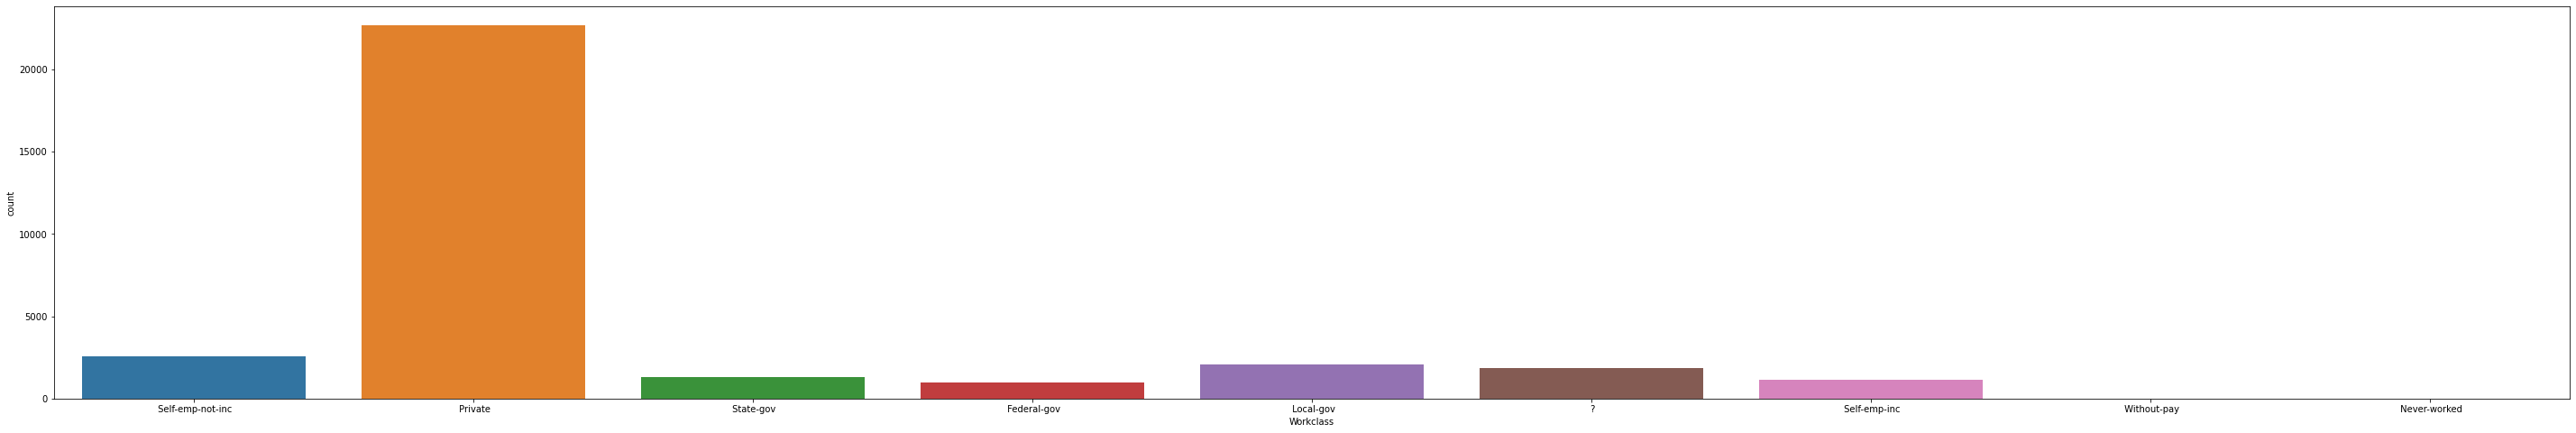

In [31]:
#Workclass
plt.figure(figsize=(50,8))
ax=sns.countplot(x='Workclass',data=df)
print(df['Workclass'].value_counts())

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


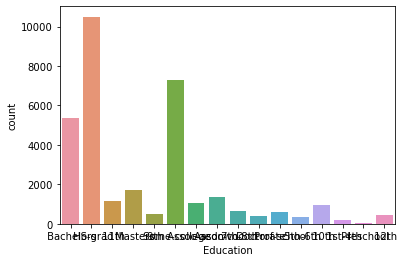

In [32]:
#Item_Fat_Content
ax=sns.countplot(x='Education',data=df)
print(df['Education'].value_counts())

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


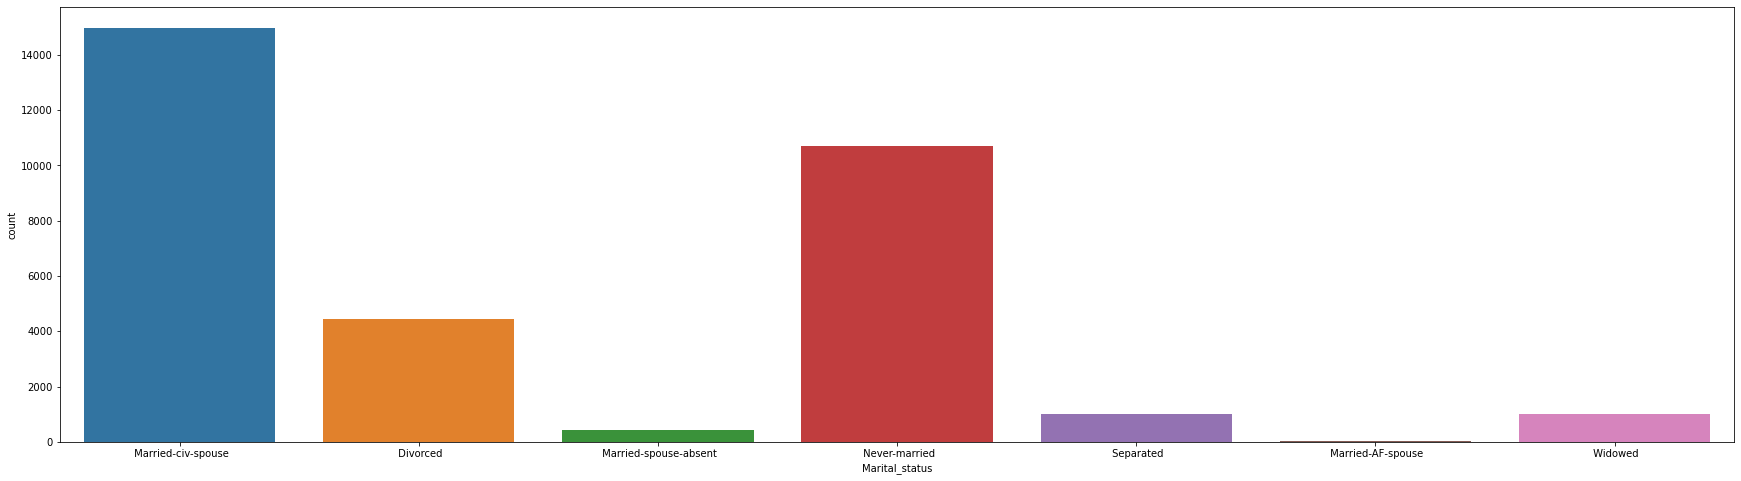

In [33]:
#Item_Type
plt.figure(figsize=(30,8))
ax=sns.countplot(x='Marital_status',data=df)
print(df['Marital_status'].value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


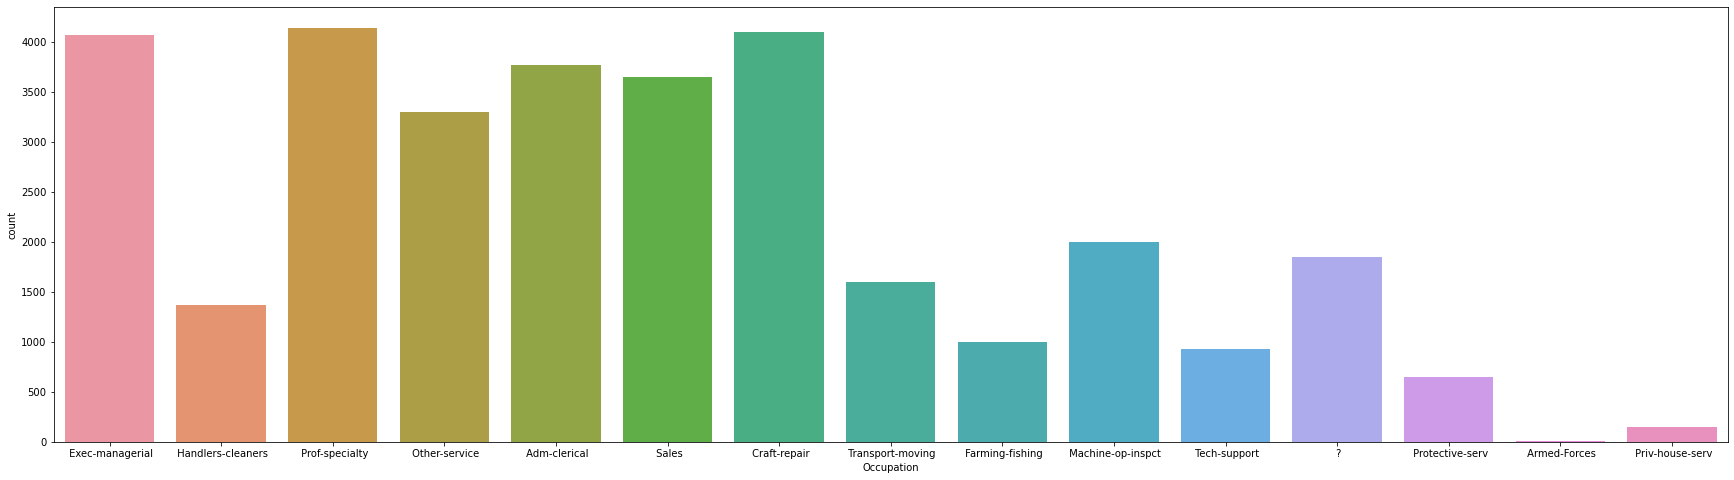

In [34]:
#Outlet_Identifier
plt.figure(figsize=(30,8))
ax=sns.countplot(x='Occupation',data=df)
print(df['Occupation'].value_counts())

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


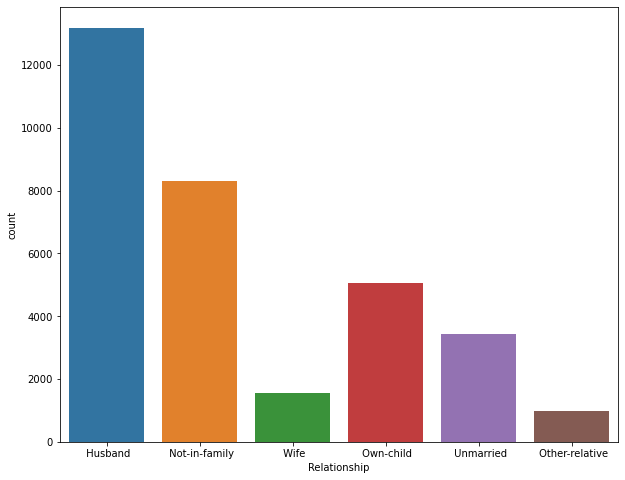

In [35]:
#Outlet_Size
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Relationship',data=df)
print(df['Relationship'].value_counts())

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


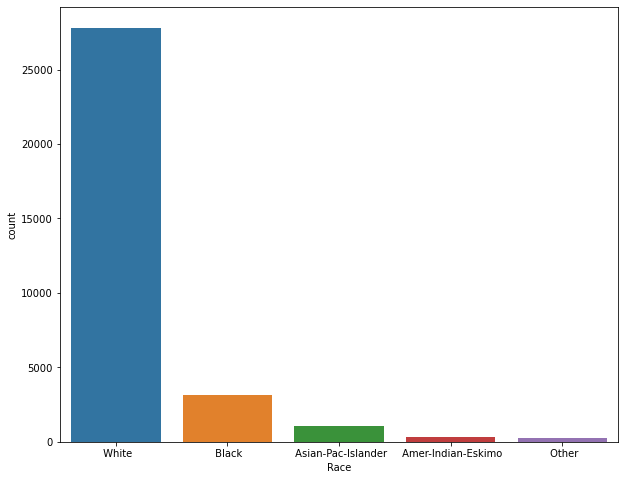

In [36]:
#Outlet_Location_Type
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Race',data=df)
print(df['Race'].value_counts())

 Male      21789
 Female    10771
Name: Sex, dtype: int64


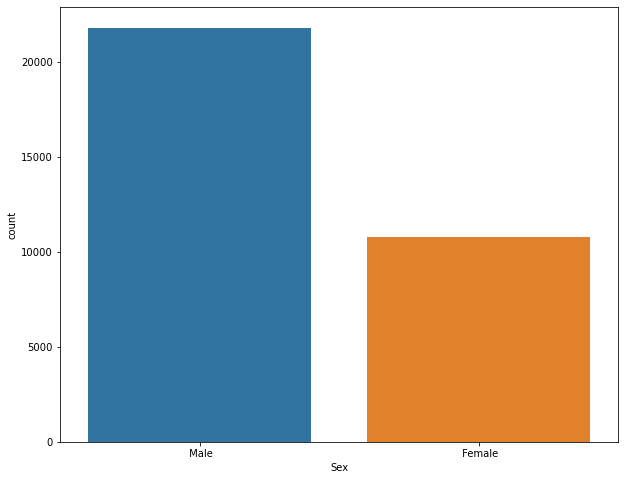

In [37]:
#Outlet_Type
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

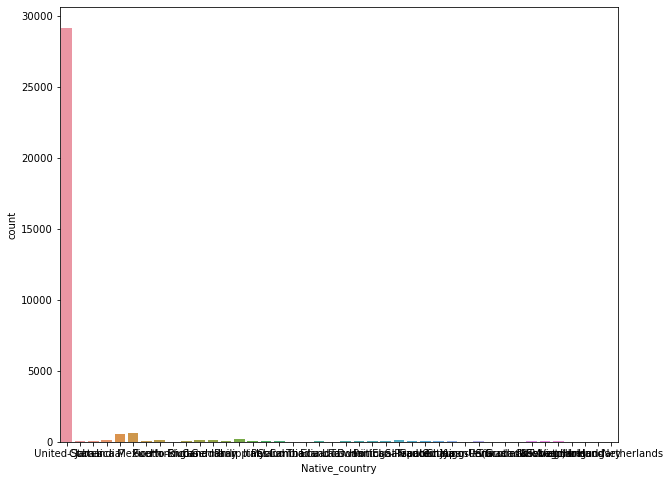

In [38]:
#Outlet_Type
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Native_country',data=df)
print(df['Native_country'].value_counts())

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


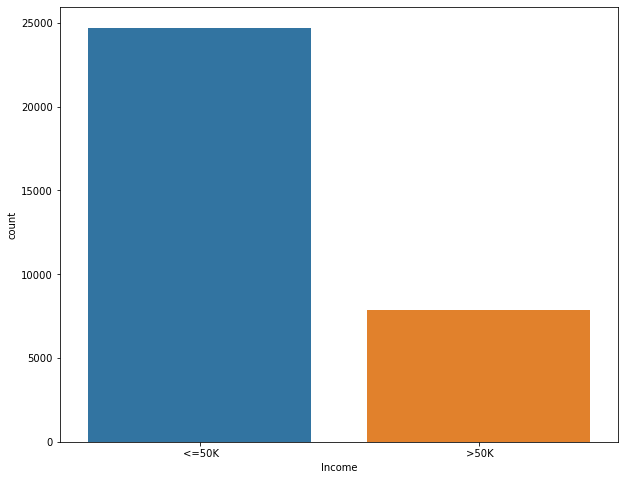

In [39]:
#Income target/label
# As we can see from the visualisation of the target,the target data is imbalanced.
# We will have to employ some oversampling or undersampling techniques to correct this issue.
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Income',data=df)
print(df['Income'].value_counts())


# Observations Univariate Analysis on Categorical Data 
From the above count plots 
- The Item_identifiers have a lot of factors(1559) which has affected the visibility of its plot
- Majority of the sample items are low in fat.
- Majority of the sample items were fruits and vegitables
- Majority of the samples were selected from Outlet number 27 under Supermarket 3 
- Majority of the samples were selected from Outlets with Medium Sizes
- Majority of the samples were selected from the Tier 3 Outlets
- Majority of the samples were selected from Supermarket Type1

# Step 3.2 Updating Null values

In [40]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We shall update:
- All continous data with the mean
- All Categorical data with the mode

Lets go!

In [41]:
df['Capital_gain']=df['Capital_gain'].replace(0,df['Capital_gain'].mean())
df['Capital_loss']=df['Capital_loss'].replace(0,df['Capital_loss'].mean())
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,1077.615172,87.306511,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,1077.615172,87.306511,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,1077.615172,87.306511,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,1077.615172,87.306511,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,1077.615172,87.306511,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,1077.615172,87.306511,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1077.615172,87.306511,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,1077.615172,87.306511,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,1077.615172,87.306511,20,United-States,<=50K


In [42]:
#rechecing for null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

 # Observations on Null Update 
From the above we can see that there are no null values! 

# Step 3.3 Encoding
- We cannot perform Exploratory Data Analysis on Non-numerical Data, so we have to first of all convert them to numerical data
- Here we shall adopt Ordinal Encoder to transform the all Non-numerical column into Numerical Data!

In [43]:
#initializing....
enc=OrdinalEncoder()

In [44]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,1077.615172,87.306511,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,1077.615172,87.306511,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,1077.615172,87.306511,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,1077.615172,87.306511,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,1077.615172,87.306511,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,1077.615172,87.306511,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1077.615172,87.306511,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,1077.615172,87.306511,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,1077.615172,87.306511,20,United-States,<=50K


In [45]:
df.dtypes

Age                 int64
Workclass          object
Fnlwgt              int64
Education          object
Education_num       int64
Marital_status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_gain      float64
Capital_loss      float64
Hours_per_week      int64
Native_country     object
Income             object
dtype: object

In [46]:
#Tranforming into numerical data
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [47]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,1077.615172,87.306511,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,1077.615172,87.306511,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,1077.615172,87.306511,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,1077.615172,87.306511,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,1077.615172,87.306511,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,1077.615172,87.306511,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,1077.615172,87.306511,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,1077.615172,87.306511,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,1077.615172,87.306511,20,39.0,0.0


In [48]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,1077.615172,87.306511,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,1077.615172,87.306511,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,1077.615172,87.306511,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,1077.615172,87.306511,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,1077.615172,87.306511,40,39.0,0.0


In [49]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,1077.615172,87.306511,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,1077.615172,87.306511,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,1077.615172,87.306511,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,1077.615172,87.306511,20,39.0,0.0
32559,52,5.0,287927,11.0,9,2.0,4.0,5.0,4.0,0.0,15024.000000,87.306511,40,39.0,1.0


In [50]:
df.sample(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
30650,45,4.0,341762,12.0,14,2.0,4.0,0.0,4.0,1.0,1077.615172,87.306511,65,39.0,1.0
10323,35,7.0,483530,15.0,10,0.0,13.0,4.0,4.0,0.0,1077.615172,87.306511,40,39.0,0.0
17513,24,4.0,417668,9.0,13,4.0,10.0,3.0,4.0,1.0,1077.615172,87.306511,20,39.0,0.0
10142,35,0.0,164866,0.0,6,0.0,0.0,1.0,4.0,1.0,1077.615172,87.306511,99,39.0,0.0
16569,18,4.0,96483,11.0,9,4.0,8.0,3.0,1.0,0.0,1077.615172,87.306511,20,39.0,0.0
19609,22,4.0,340543,11.0,9,4.0,13.0,1.0,4.0,0.0,1077.615172,87.306511,40,39.0,0.0
2274,23,4.0,196827,15.0,10,2.0,7.0,0.0,4.0,1.0,1077.615172,1902.000000,40,39.0,0.0
24940,48,1.0,497486,11.0,9,3.0,1.0,4.0,4.0,0.0,1471.000000,87.306511,40,39.0,0.0
27680,19,4.0,238474,1.0,7,4.0,7.0,3.0,4.0,1.0,1077.615172,87.306511,40,39.0,0.0
20622,23,4.0,214635,11.0,9,4.0,3.0,1.0,4.0,1.0,1077.615172,87.306511,40,39.0,0.0


In [51]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,2065.506304,170.539970,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7245.938132,384.950157,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,114.000000,87.306511,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,1077.615172,87.306511,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,1077.615172,87.306511,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,1077.615172,87.306511,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [52]:
df.dtypes

Age                 int64
Workclass         float64
Fnlwgt              int64
Education         float64
Education_num       int64
Marital_status    float64
Occupation        float64
Relationship      float64
Race              float64
Sex               float64
Capital_gain      float64
Capital_loss      float64
Hours_per_week      int64
Native_country    float64
Income            float64
dtype: object

# Observations on Encoding
Frome the above its crystal clear that all Non-numrical data have been converted(encoded) to Numerical Data!

# Step 3.4 - Normal Distribution Check(Univariate Analysis)

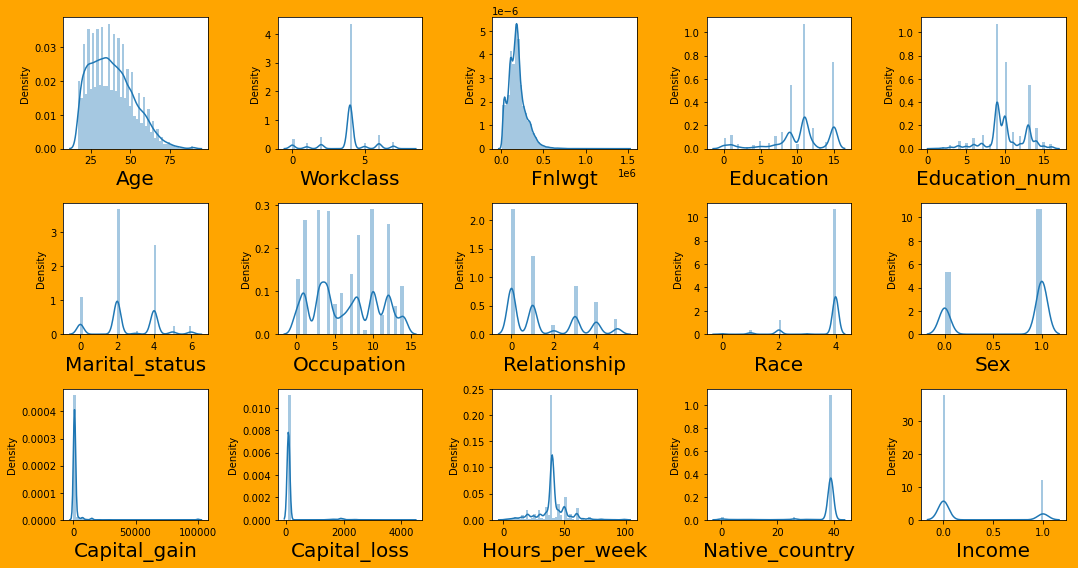

In [53]:
#Check for normal distribution and see how data is distributed for every column
plt.figure(figsize=(15,8), facecolor='orange')#dimension and color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=15:
        ax = plt.subplot(3,5,plotnumber)#2,3 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Normal Distribution Check
From the above density plot:

- We can see that All the features does not obey a normal distribution, the building blocks is not in tandem with a normalized     curve

- The categorical data has no contribution to our Model Building since they are categorical in nature

- The normal distribution of the Income columns also has no contribution to our Model Building since its the Target     variable

In [54]:
#extracting only the features(wihtout the Label) from the original dataset and store in features
features=df.drop(columns=['Income'],axis=1)
features

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,1077.615172,87.306511,13,39.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,1077.615172,87.306511,40,39.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,1077.615172,87.306511,40,39.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,1077.615172,87.306511,40,5.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,1077.615172,87.306511,40,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,1077.615172,87.306511,38,39.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,1077.615172,87.306511,40,39.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,1077.615172,87.306511,40,39.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,1077.615172,87.306511,20,39.0


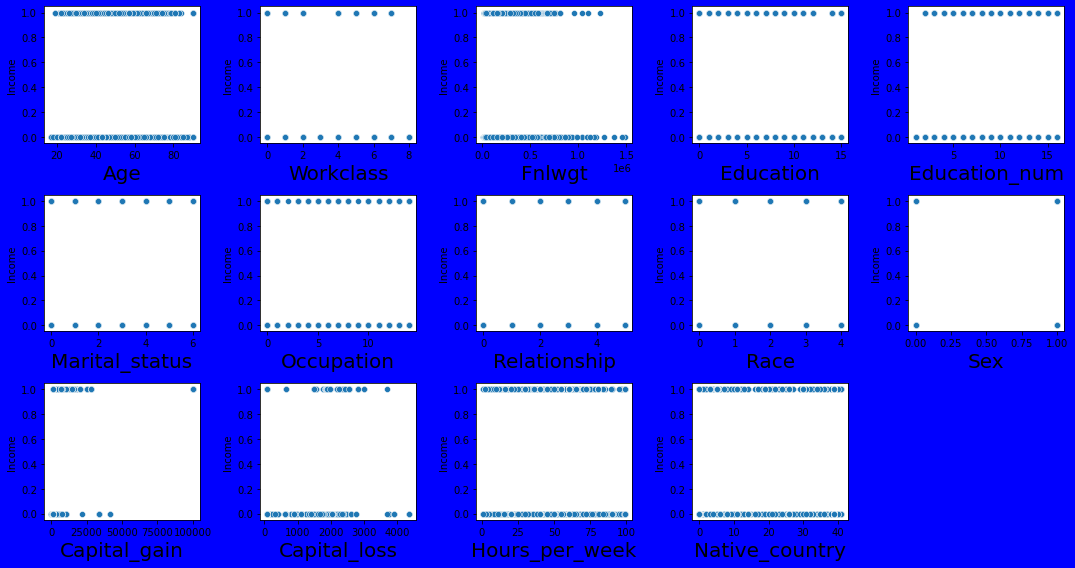

In [55]:
#Check for the relatinship between each features and Target
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features:#triggering your for loop
    if plotnumber<=14:#since there are 3 features
        ax = plt.subplot(3,5,plotnumber)#3,4 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.scatterplot(x=features[column],y=df['Income'])#performing a relationship plot between features and label
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Scatter Plot

From the above scatter plot we can see a strong relationship between some of the features and the Label(Item_Outlet_Sales).

# Step 3.5 - Count Plot Check(Bivariate Analysis)
- Lets visualize the relationship between the Categorical features and the Label

4.0    22696
6.0     2541
2.0     2093
0.0     1836
7.0     1297
5.0     1116
1.0      960
8.0       14
3.0        7
Name: Workclass, dtype: int64


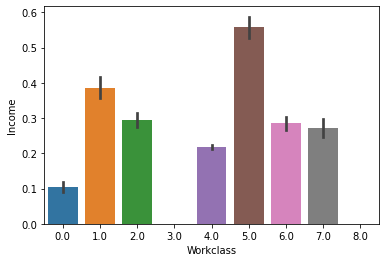

In [56]:
#Bivariate analysis
ax = sns.barplot(x='Workclass',y='Income',data=df)
print(df['Workclass'].value_counts())

11.0    10501
15.0     7291
9.0      5354
12.0     1723
8.0      1382
1.0      1175
7.0      1067
0.0       933
5.0       646
14.0      576
6.0       514
2.0       433
10.0      413
4.0       333
3.0       168
13.0       51
Name: Education, dtype: int64


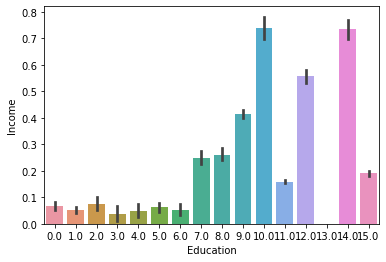

In [57]:
#Education
ax=sns.barplot(x='Education',y='Income',data=df)
print(df['Education'].value_counts())

2.0    14976
4.0    10682
0.0     4443
5.0     1025
6.0      993
3.0      418
1.0       23
Name: Marital_status, dtype: int64


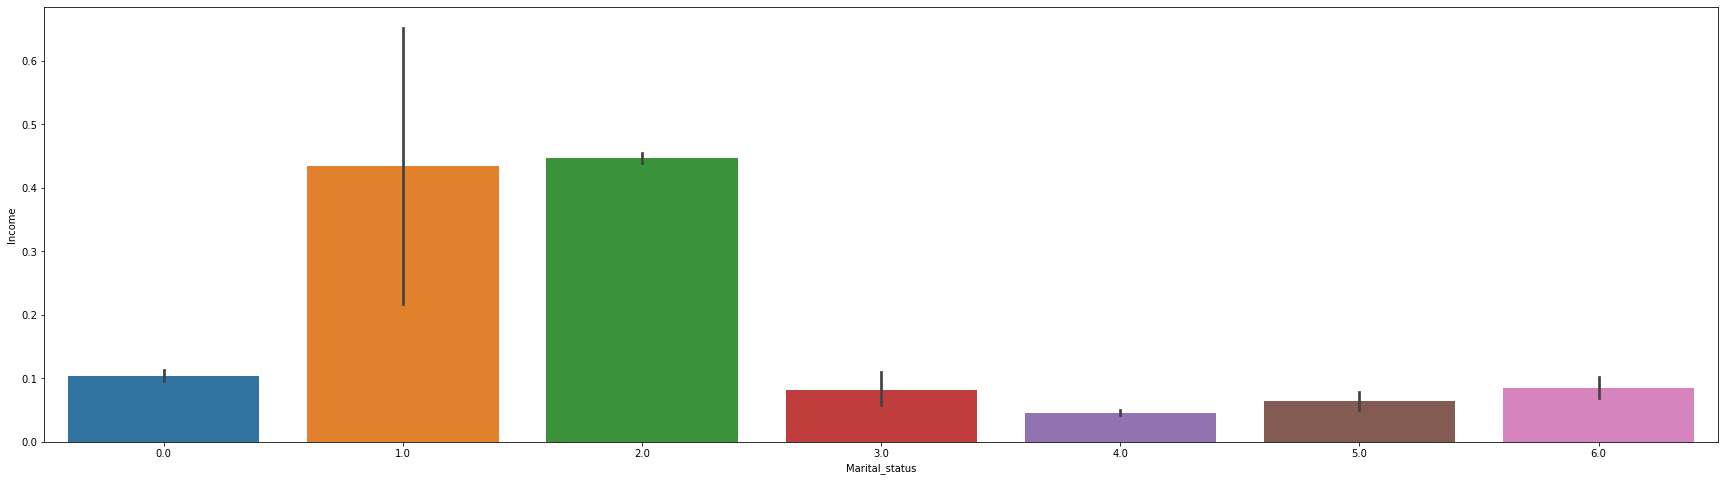

In [58]:
#Marital_status
plt.figure(figsize=(30,8))
ax=sns.barplot(x='Marital_status',y='Income',data=df)
print(df['Marital_status'].value_counts())

10.0    4140
3.0     4099
4.0     4066
1.0     3769
12.0    3650
8.0     3295
7.0     2002
0.0     1843
14.0    1597
6.0     1370
5.0      994
13.0     928
11.0     649
9.0      149
2.0        9
Name: Occupation, dtype: int64


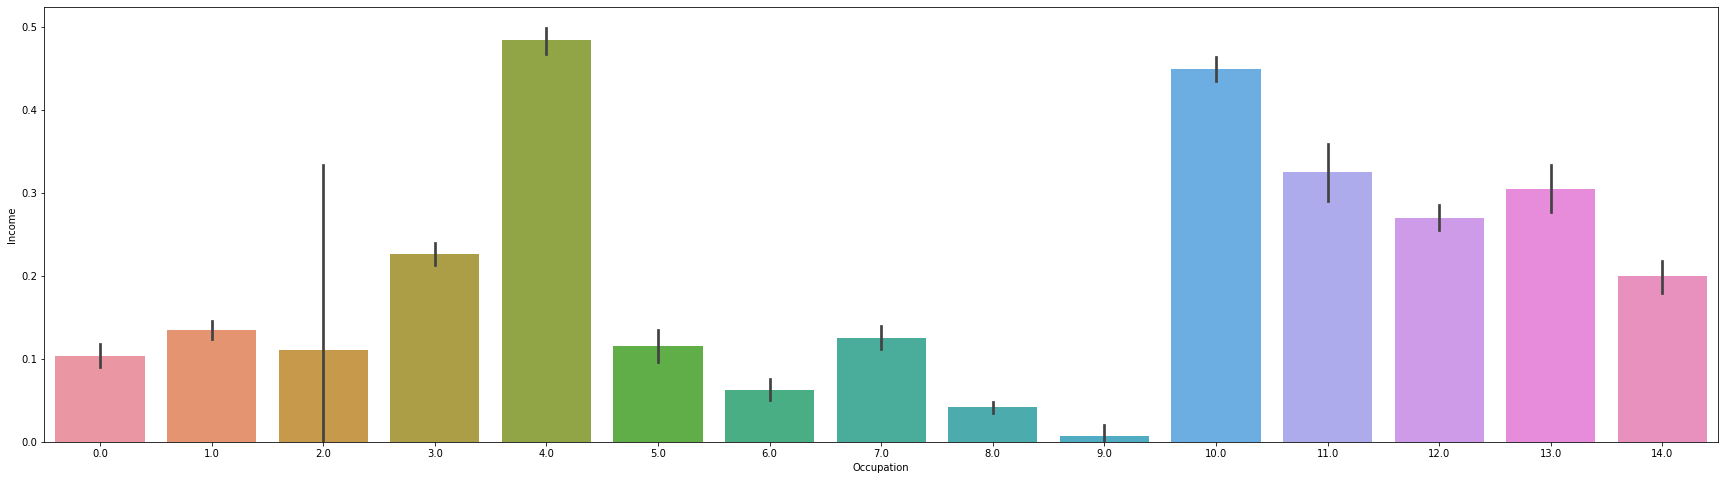

In [59]:
#Occupation
plt.figure(figsize=(30,8))
ax=sns.barplot(x='Occupation',y='Income',data=df)
print(df['Occupation'].value_counts())

0.0    13193
1.0     8304
3.0     5068
4.0     3446
5.0     1568
2.0      981
Name: Relationship, dtype: int64


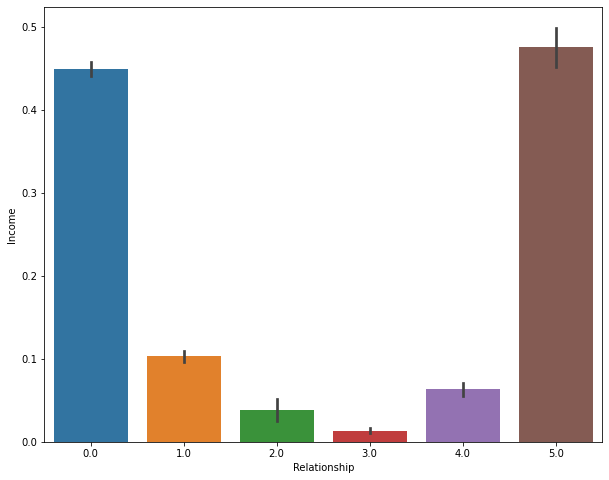

In [60]:
#Relationship
plt.figure(figsize=(10,8))
ax=sns.barplot(x='Relationship',y='Income',data=df)
print(df['Relationship'].value_counts())

4.0    27815
2.0     3124
1.0     1039
0.0      311
3.0      271
Name: Race, dtype: int64


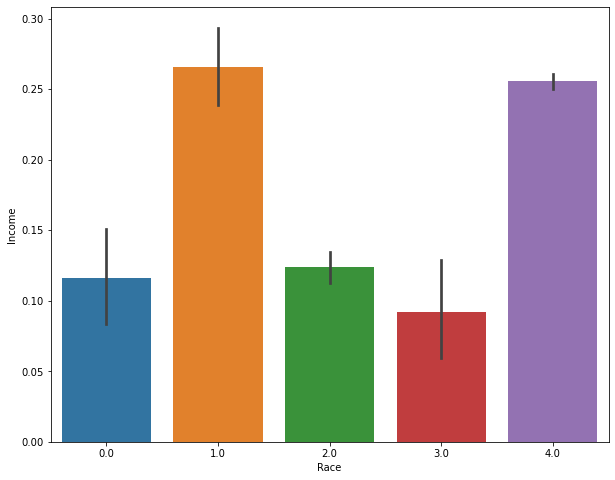

In [61]:
#Race
plt.figure(figsize=(10,8))
ax=sns.barplot(x='Race',y='Income',data=df)
print(df['Race'].value_counts())

1.0    21789
0.0    10771
Name: Sex, dtype: int64


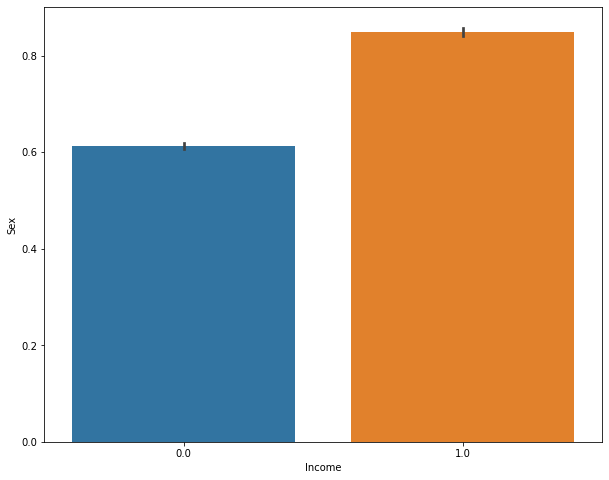

In [62]:
#Sex
plt.figure(figsize=(10,8))
ax=sns.barplot(x='Income',y='Sex',data=df)
print(df['Sex'].value_counts())

# From the analysis below the females earned 

39.0    29169
26.0      643
0.0       583
30.0      198
11.0      137
2.0       121
33.0      114
8.0       106
19.0      100
5.0        95
9.0        90
23.0       81
35.0       80
3.0        75
22.0       73
6.0        70
40.0       67
13.0       64
24.0       62
31.0       60
4.0        59
36.0       51
14.0       44
20.0       43
32.0       37
27.0       34
29.0       31
10.0       29
12.0       29
7.0        28
21.0       24
17.0       20
1.0        19
38.0       19
25.0       18
37.0       18
41.0       16
28.0       14
16.0       13
18.0       13
34.0       12
15.0        1
Name: Native_country, dtype: int64


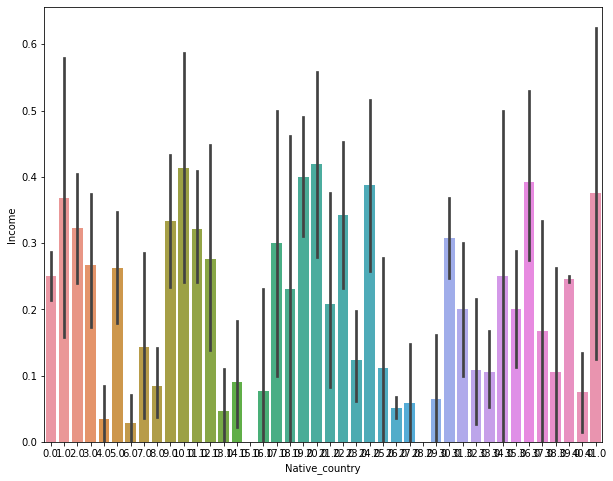

In [63]:
#Native_country
plt.figure(figsize=(10,8))
ax=sns.barplot(x='Native_country',y='Income',data=df)
print(df['Native_country'].value_counts())

# Step 3.6 - Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis;
 - Collinearity Between Feature and Label
 - Multicolinearity between features

Lets see/visualize the correlation between (Features vs Label) and (Features vs Features)

In [64]:
#checking for general correlation
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.074234,0.058061,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033730,0.012318,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000640,-0.010309,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.029750,0.016739,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.120248,0.080019,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.041651,-0.034050,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025314,0.017920,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.055818,-0.061243,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.010389,0.018920,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.046752,0.045729,0.229312,-0.008125,0.215995


In [65]:
#checking for correlation between each feature and Label
df.corr()['Income'].sort_values()

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.009481
Native_country    0.015845
Workclass         0.051645
Race              0.071853
Occupation        0.075448
Education         0.079311
Capital_loss      0.150934
Sex               0.215995
Capital_gain      0.216691
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

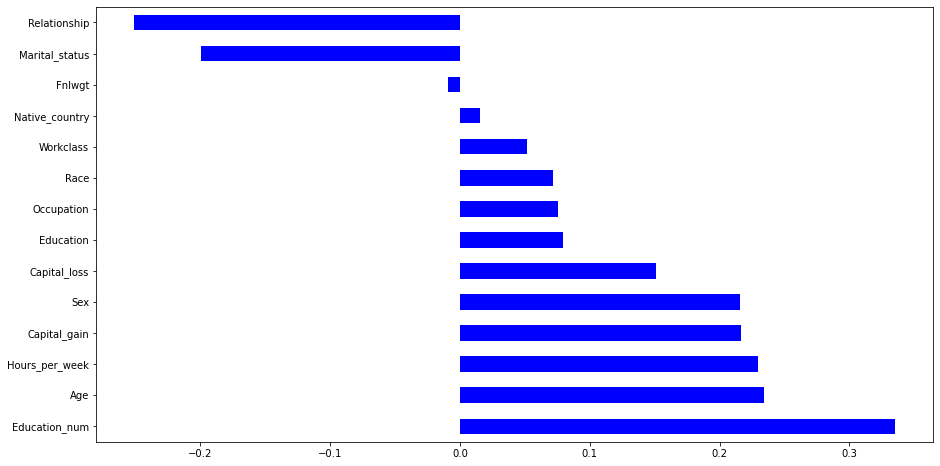

In [66]:
#Plotting a bar chart to visualize correlation through the stand-alone bars
plt.figure(figsize=(15,8))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='barh', color='b')
plt.show()

# Multicollinearity Check

<AxesSubplot:>

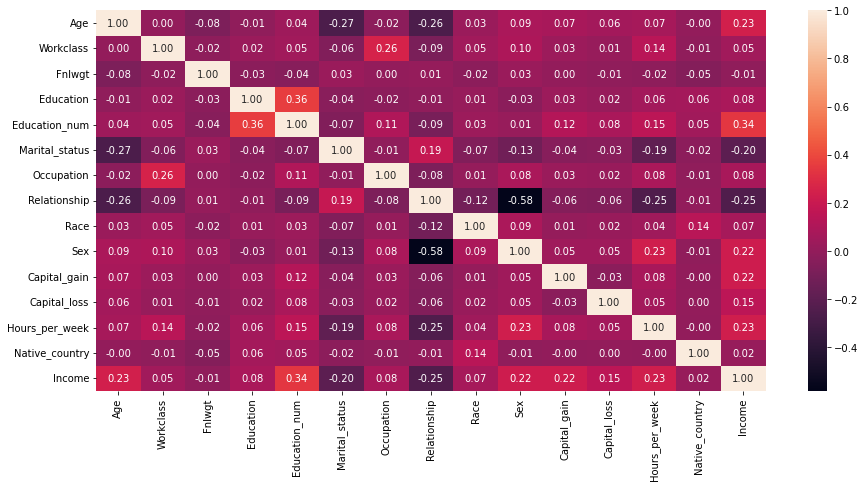

In [67]:
#Plotting a heatmap to show correlation through the brightness of the map-squares
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

Hmmmm....we can see that most features DO NOT share a 'direct relationship' between each other! as the majority of the map-squares are not bright! But lets conlcude with our findings first:

<function matplotlib.pyplot.show(close=None, block=None)>

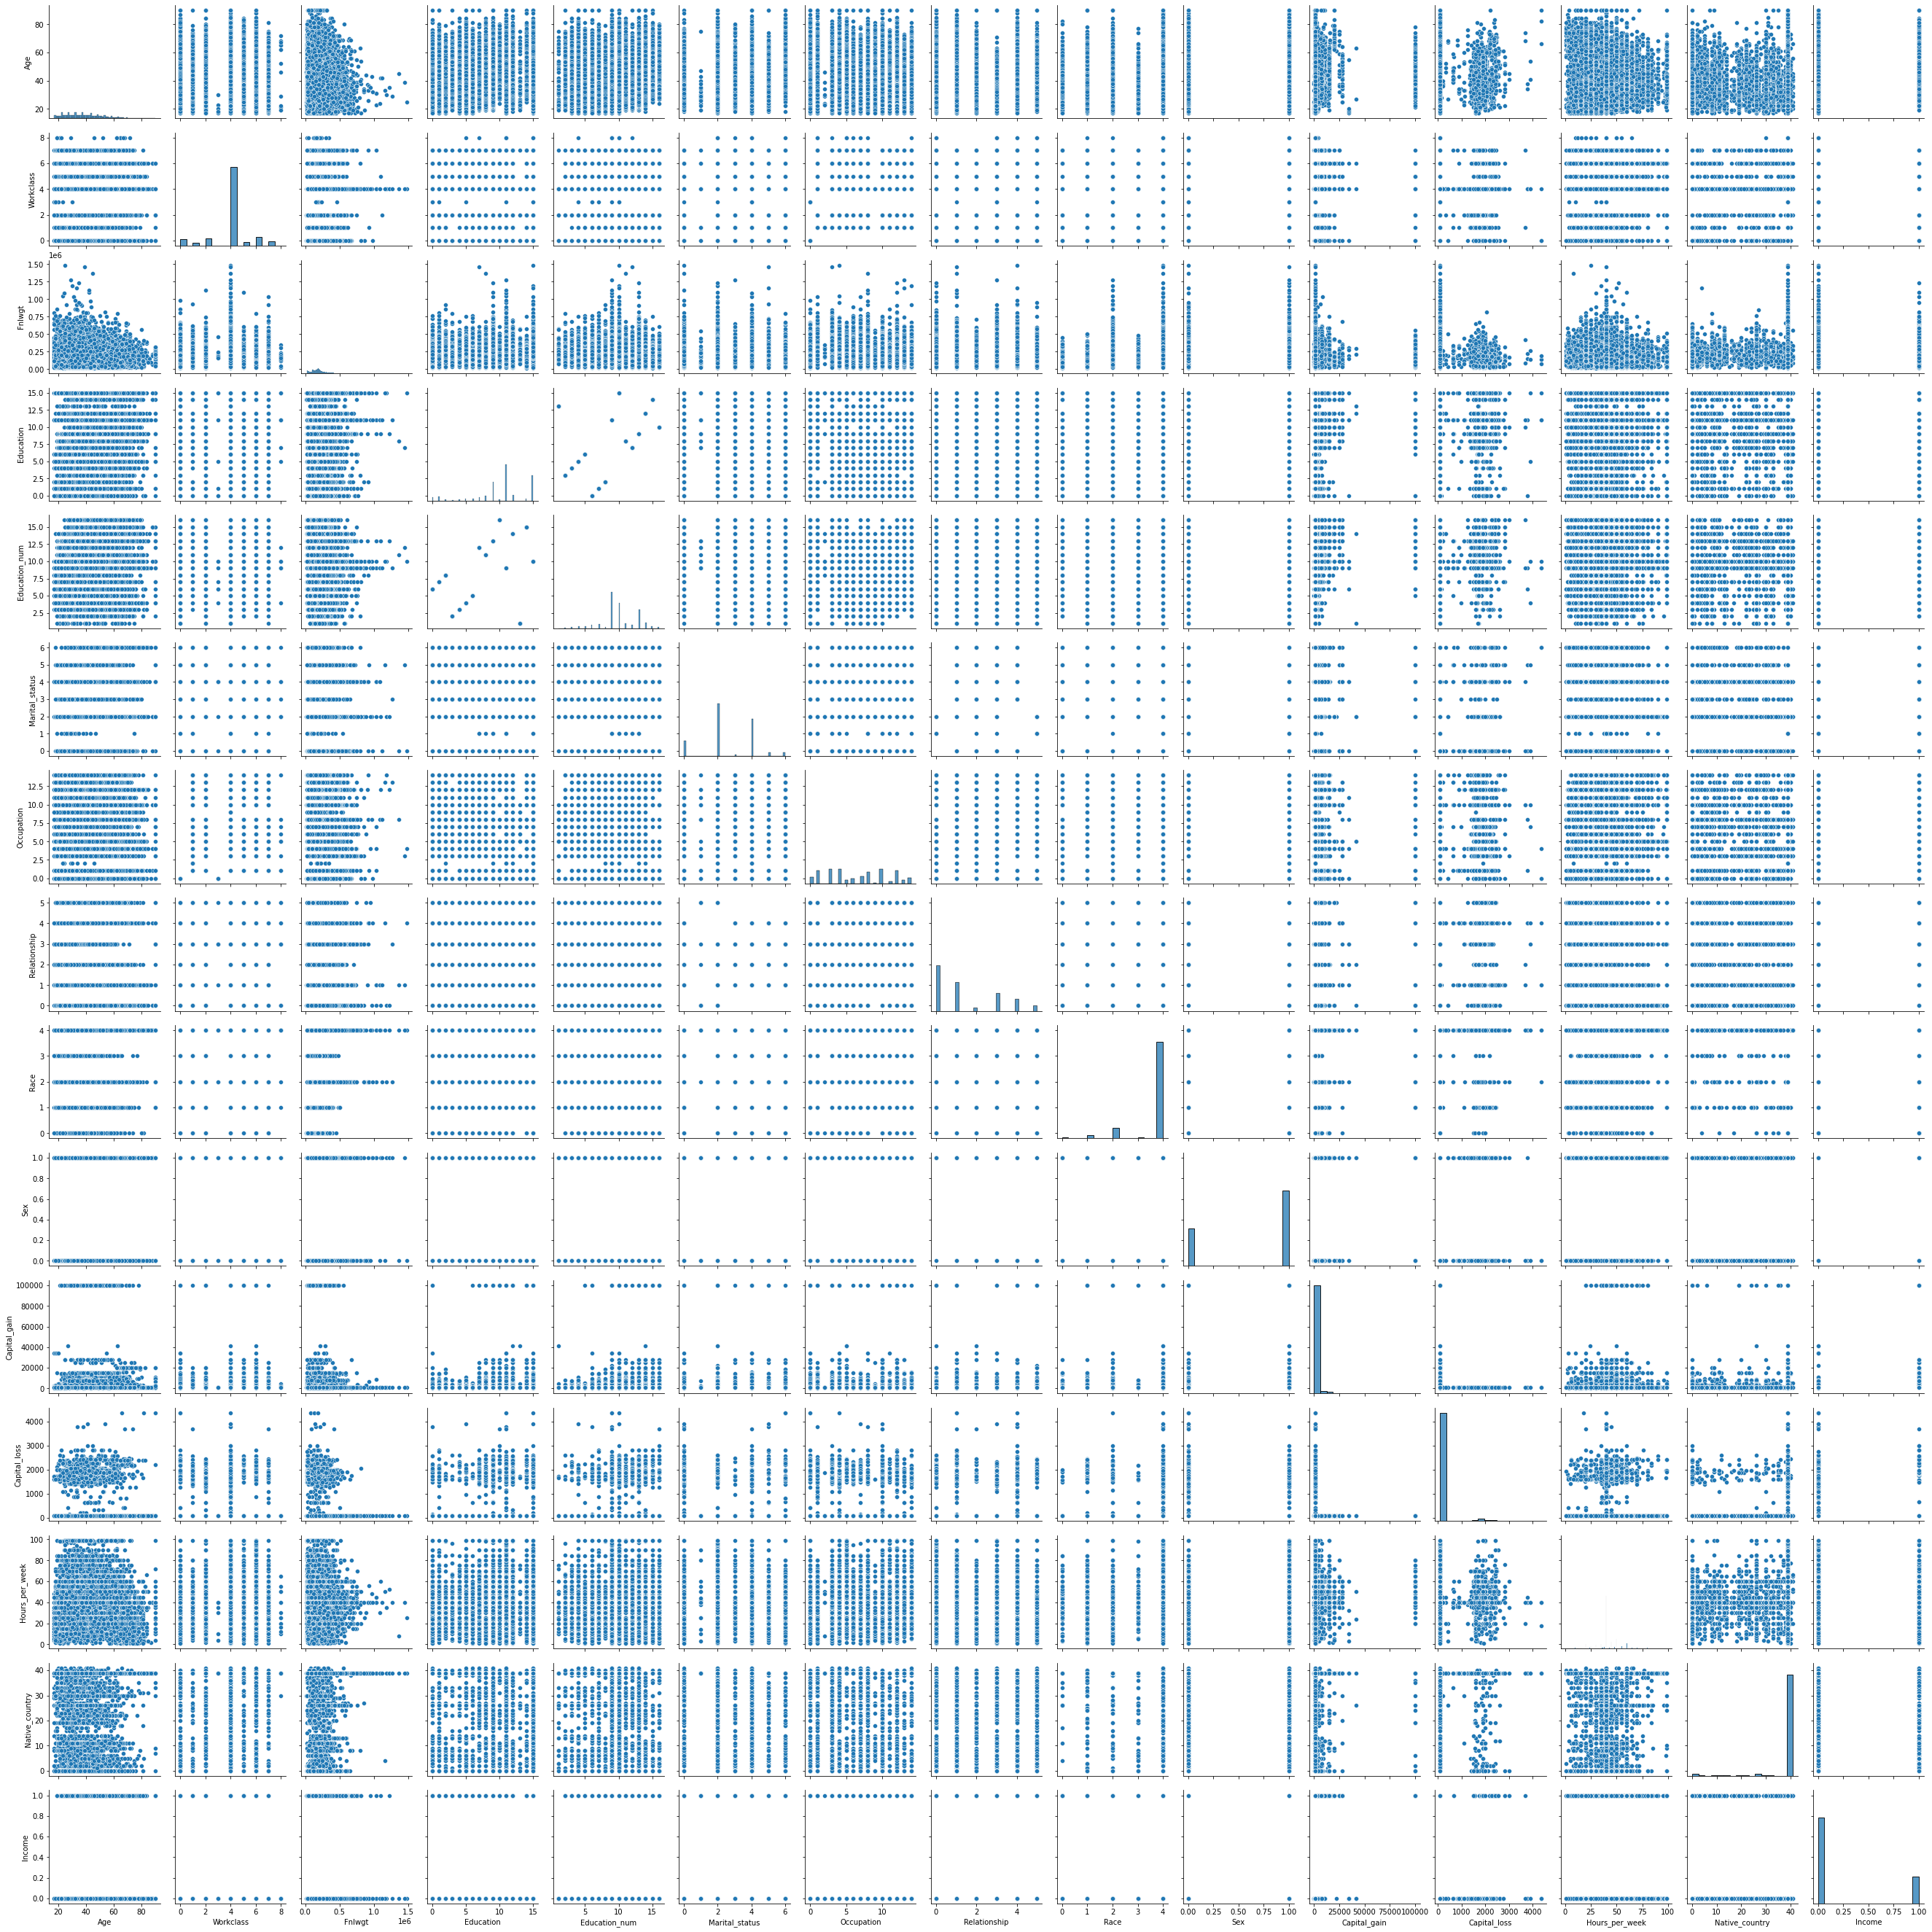

In [68]:
#lets also consumate further our quest for Multicollinearity check by ploting a pair plot
sns.pairplot(df)
plt.show

In [69]:
df.corr()['Income'].sort_values()

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.009481
Native_country    0.015845
Workclass         0.051645
Race              0.071853
Occupation        0.075448
Education         0.079311
Capital_loss      0.150934
Sex               0.215995
Capital_gain      0.216691
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

# Observations on Correlation(Collinearity & Multicollinearity)
From the above correlation statistics;

Collinearity:
 - Relationship has a negative correlation of 25% with the target column which can be considered as a weak bond
 - Marital_status  has a negative correlation of 20% with the target column which can be considered as a weak bond
 - Outlet_Establishment_Year  has a negative correlation of 5% with the target column which can be considered as a weak bond
 - Fnlwgt has a positive correlation of 0.2% with the target column which can be considered as a poor bond
 - Native_country has a positive correlation of 0.009% with the target column which can be considered as a poor bond
 - Workclass has a positive correlation of 0.01% with the target column which can be considered as a poor bond
 - Race has a positive correlation of 1.7% with the target column which can be considered as a  poor bond
 - Occupation  has a positive correlation of 8.9% with the target column which can be considered as a weak bond
 - Education has a positive correlation of 16% with the target column which can be considered as a fair bond
 - Outlet_Type   has a positive correlation of 40% with the target column which can be considered as a good bond
 - Capital_loss has a positive correlation of 57% with the target column which can be considered as a good bond
 - Sex has a positive correlation of 57% with the target column which can be considered as a good bond
 - Capital_gain has a positive correlation of 57% with the target column which can be considered as a good bond
 - Hours_per_week has a positive correlation of 57% with the target column which can be considered as a good bond
 - Age  has a positive correlation of 57% with the target column which can be considered as a good bond
 - Education_num  has a positive correlation of 57% with the target column which can be considered as a good bond

 
 - Feature with Maximum correlation = '57%'
 - Feature with Minimum correlation = '0.2%'
 
Multicollinearity:
 - From the heatmap we can see that the ALMOST ALL pairs of features DOES NOT have noticeable correllation between them 

But we will reconfrim this during further steps by finding the Variance Inflation Factor(VIF)


NB: Multicollinnearity means two variables are explaining the same thing, meaning one of them is useless and therefore we have to drop one of them!

# Step 3.4 - Outlier Check

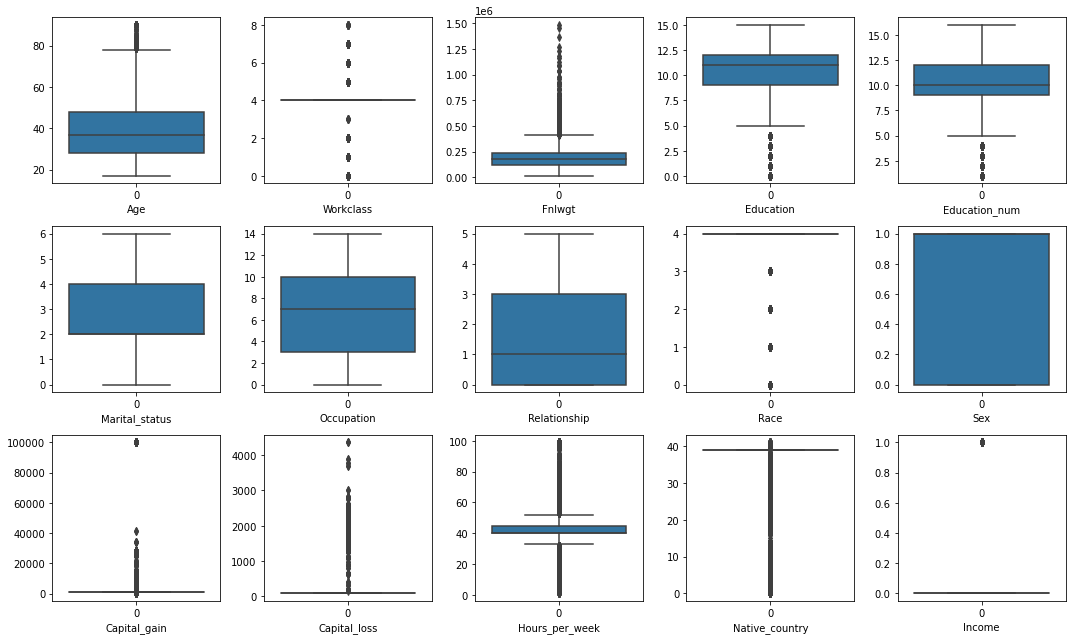

In [70]:
#Check for allien-datapoints in each features data which has been stored in the dataframe; 'features_continuos'
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if graph<=15:#this was made 8 just to allow for 4 spaces
        plt.subplot(3,5,graph)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df[column])#performing a box plot for all columns
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

# Observations on Outlier Check
 - From the above visualization plot its evident ONLY the item_visibility feature posses outliers, however this is subject to      further analysis and reconfirmation using the zscore!
 
 -  The outlier of the categorical data does not impact our model
 
 - The outlier of the Target data does not impact our model

# Step 3.5 - Skewness Check

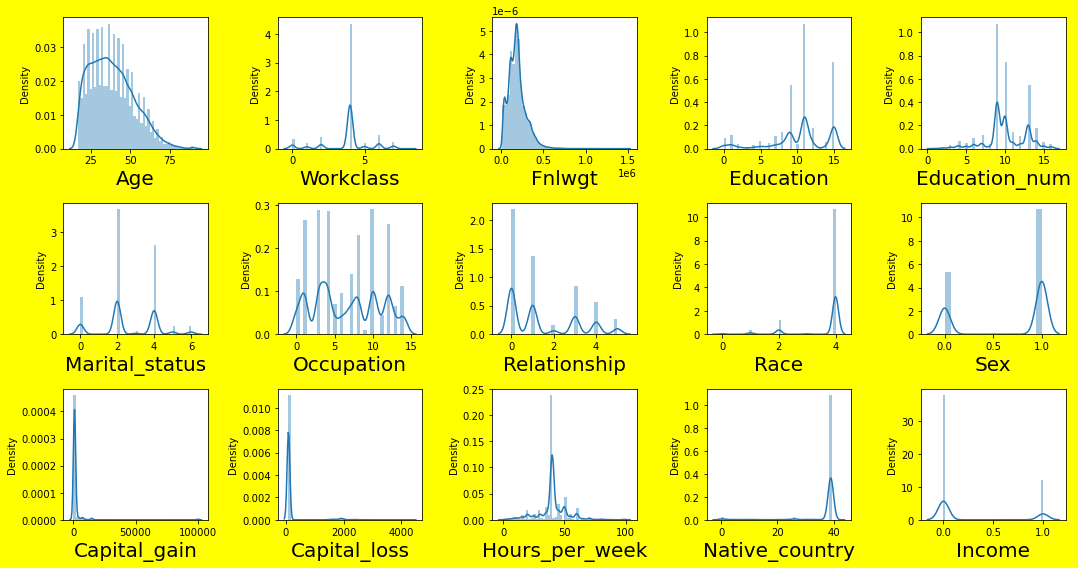

In [71]:
#Visualizing for skewness...
plt.figure(figsize=(15,8), facecolor='yellow')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(df[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

In [72]:
#Checking for skewness in each independent variable data which has been stored in the dataframe; 'features'
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      12.248734
Capital_loss       4.622613
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

# Observations on Skewness Check: 
Lets assume Skewness threshold is taken as +/-0.50.Meaning any value outside +/-0.50 contains skewness. Hence the below features are skewed:

Workclass         -0.752280
Fnlwgt             1.446972
Education     
Native_country 
Income           

# Step 4 - DATA PREPROCESSING

# Step 4.1 - Removal of Duplicates and Unwanted Column

In [73]:
#Recheking shape of original data
df.shape

(32560, 15)

In [74]:
#Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(32536, 15)

It appears there are no duplicates since there is no change in the number of rows!

# Step 4.2 - Dropping of Features that strongly promotes multicollinearity(VIF)

<AxesSubplot:>

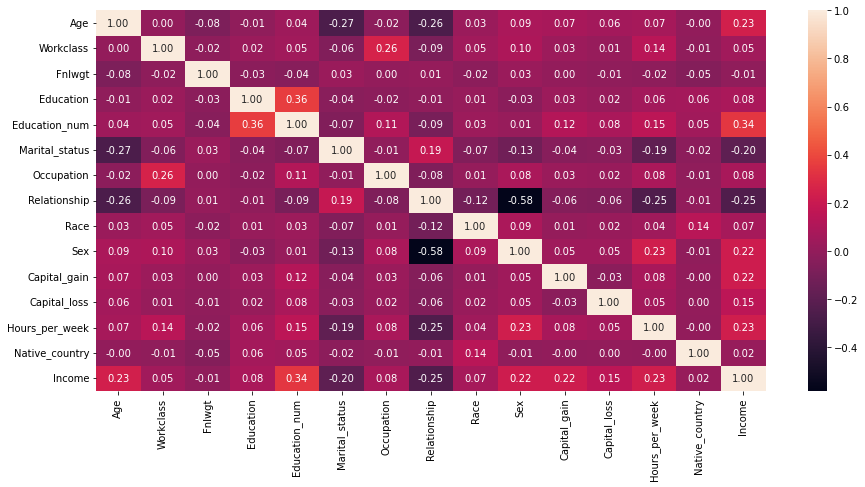

In [75]:
#Lets have a view of the heatmap again with particular focus on map-squares that are more brightened
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

From the heatmap above we can see that there is no visible correlation between one another

However, lets reconfirm by calculating the Variance Inflation Factor(VIF)!

# Variance Inflation Factor(VIF)

To solve this multicollinearity problem, we have to first scale our data using Standard Scaler

In [76]:
X=df.drop(columns=['Income'])
Y=df['Income']

In [77]:
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[ 0.83696128,  1.4635048 , -1.0087032 , ..., -0.21630558,
        -2.22244997,  0.29134033],
       [-0.04293421,  0.09020015,  0.24500772, ..., -0.21630558,
        -0.03566429,  0.29134033],
       [ 1.05693515,  0.09020015,  0.42571982, ..., -0.21630558,
        -0.03566429,  0.29134033],
       ...,
       [ 1.42355827,  0.09020015, -0.35881227, ..., -0.21630558,
        -0.03566429,  0.29134033],
       [-1.21612819,  0.09020015,  0.11089708, ..., -0.21630558,
        -1.65550554,  0.29134033],
       [ 0.98361053,  0.77685248,  0.92978106, ..., -0.21630558,
        -0.03566429,  0.29134033]])

In [78]:
#checking the shape
X_Scaled.shape

(32536, 14)

Now we shall treat the above shape as an array of numbers(tuple) where 8523 and 11 are the zeroth and first index respectively.

In [79]:
#initializing...creating an empty dataframe stored in vif
vif=pd.DataFrame()

In [80]:
vif['vif']=[variance_inflation_factor(X_Scaled, i) for i in range(X_Scaled.shape[1])]#This is a list comprehension. in the for loop, the range(X_Scaled.shape[1]) which also means range(3) or (0,1,2), since X_Scaled.shape[1] means the first index in the X_Scaled.shape which is 3. Now all the columns in X_Scaled which is (0,1,2) will now be compared with the entire X_Scaled one by one using the other part of the syntax which is variance_inflation_factor(X_Scaled, i). To shed more light, what happens here is that during th comparison using variance_inflation_factor(X_Scaled, i), the i is seen as a ‘Label’ while the X_Scaled is seen as a Feature. The output of this list comprehension is then stored in a column named 'vif' inside the empty ‘vif dataframe’ created above

In [81]:
vif['Features'] = X.columns#creating another column named 'Features' inside the empty vif Dataframe created earlier and populating it with a data called X.columns(i.e column names from the X DataFrame which was created by dropping the Label – ‘sales’ )
vif

,vif,Features
0,1.159941,Age
1,1.094061,Workclass
2,1.012302,Fnlwgt
3,1.159208,Education
4,1.217802,Education_num
5,1.127326,Marital_status
6,1.091923,Occupation
7,1.683261,Relationship
8,1.038284,Race
9,1.559985,Sex


From the above vif dataframe,we are setting a vif threshold of 6, meaning any feature with Variance Inflation Factor greater than 5 is assumed to have a multicollinearity problem. it is not standard. The dataset demands.

In lieu of the above assumption, MULTICOLLINEARITY DOES NOT EXIST!

# Step 4.3 - Removal of Outliers

This will be achieved using the zscore

In [82]:
#Get the absolute value of the zscore of the remaining dataset
np.abs(zscore(df))

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.836961,1.463505,1.008703,0.335272,1.134817,0.405890,0.608366,0.900122,0.393692,0.703036,0.136391,0.216306,2.222450,0.291340,0.563389
1,0.042934,0.090200,0.245008,0.181506,0.420646,1.733664,0.135486,0.277868,0.393692,0.703036,0.136391,0.216306,0.035664,0.291340,0.563389
2,1.056935,0.090200,0.425720,2.402383,1.198377,0.405890,0.135486,0.900122,1.962450,0.703036,0.136391,0.216306,0.035664,0.291340,0.563389
3,0.776180,0.090200,1.408036,0.335272,1.134817,0.405890,0.810273,2.211146,1.962450,1.422403,0.136391,0.216306,0.035664,4.056085,0.563389
4,0.116259,0.090200,0.898091,0.439895,1.523683,0.405890,0.608366,2.211146,0.393692,1.422403,0.136391,0.216306,0.035664,0.291340,0.563389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.849505,0.090200,0.639647,0.852050,0.745951,0.405890,1.519592,2.211146,0.393692,1.422403,0.136391,0.216306,0.197648,0.291340,0.563389
32556,0.103715,0.090200,0.335469,0.181506,0.420646,0.405890,0.100953,0.900122,0.393692,0.703036,0.136391,0.216306,0.035664,0.291340,1.774973
32557,1.423558,0.090200,0.358812,0.181506,0.420646,2.249657,1.317685,1.588892,0.393692,1.422403,0.136391,0.216306,0.035664,0.291340,0.563389
32558,1.216128,0.090200,0.110897,0.181506,0.420646,0.921884,1.317685,0.966639,0.393692,0.703036,0.136391,0.216306,1.655506,0.291340,0.563389


In [83]:
#checking the data shape
z=np.abs(zscore(df))
z.shape

(32536, 15)

Now we are setting threshold of outlier zscore>3, meaning any zscore above 3 is assumed to be an Outlier. Again, its not standard. The dataset demands.

In [84]:
#index number
np.where(z>3)

(array([    3,     9,    10, ..., 32508, 32526, 32528], dtype=int64),
 array([13, 12,  8, ...,  8,  8,  8], dtype=int64))

In [85]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
df_new=df[(z<3).all(axis=1)]
print("Old DataFrame",df.shape)#Data still with outliers
print("New DataFrame",df_new.shape)#Data without outliers
print("total_dropped_rows",df.shape[0]-df_new.shape[0])#Take note of this arithmetic in df.shape

Old DataFrame (32536, 15)
New DataFrame (27399, 15)
total_dropped_rows 5137


A Total of 5137 outliers have been removed! Lets move on! Data is looking great!

In [86]:
#Checking the new dataframe with non-outliers
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,1077.615172,87.306511,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,1077.615172,87.306511,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,1077.615172,87.306511,40,39.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,1077.615172,87.306511,40,39.0,0.0
5,49,4.0,160187,6.0,5,3.0,8.0,1.0,2.0,0.0,1077.615172,87.306511,16,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,1077.615172,87.306511,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,1077.615172,87.306511,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,1077.615172,87.306511,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,1077.615172,87.306511,20,39.0,0.0


Now we need to reset our data having removed outliers.....

In [87]:
#Lets reset our data having removed outliers
df_new.reset_index(inplace=True)
df_new

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,1077.615172,87.306511,13,39.0,0.0
1,1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,1077.615172,87.306511,40,39.0,0.0
2,2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,1077.615172,87.306511,40,39.0,0.0
3,4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,1077.615172,87.306511,40,39.0,0.0
4,5,49,4.0,160187,6.0,5,3.0,8.0,1.0,2.0,0.0,1077.615172,87.306511,16,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,1077.615172,87.306511,38,39.0,0.0
27395,32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,1077.615172,87.306511,40,39.0,1.0
27396,32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,1077.615172,87.306511,40,39.0,0.0
27397,32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,1077.615172,87.306511,20,39.0,0.0


In [88]:
#dropping the index columns which is not needed
df_new.drop('index', axis=1,inplace=True)
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,1077.615172,87.306511,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,1077.615172,87.306511,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,1077.615172,87.306511,40,39.0,0.0
3,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,1077.615172,87.306511,40,39.0,0.0
4,49,4.0,160187,6.0,5,3.0,8.0,1.0,2.0,0.0,1077.615172,87.306511,16,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,1077.615172,87.306511,38,39.0,0.0
27395,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,1077.615172,87.306511,40,39.0,1.0
27396,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,1077.615172,87.306511,40,39.0,0.0
27397,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,1077.615172,87.306511,20,39.0,0.0


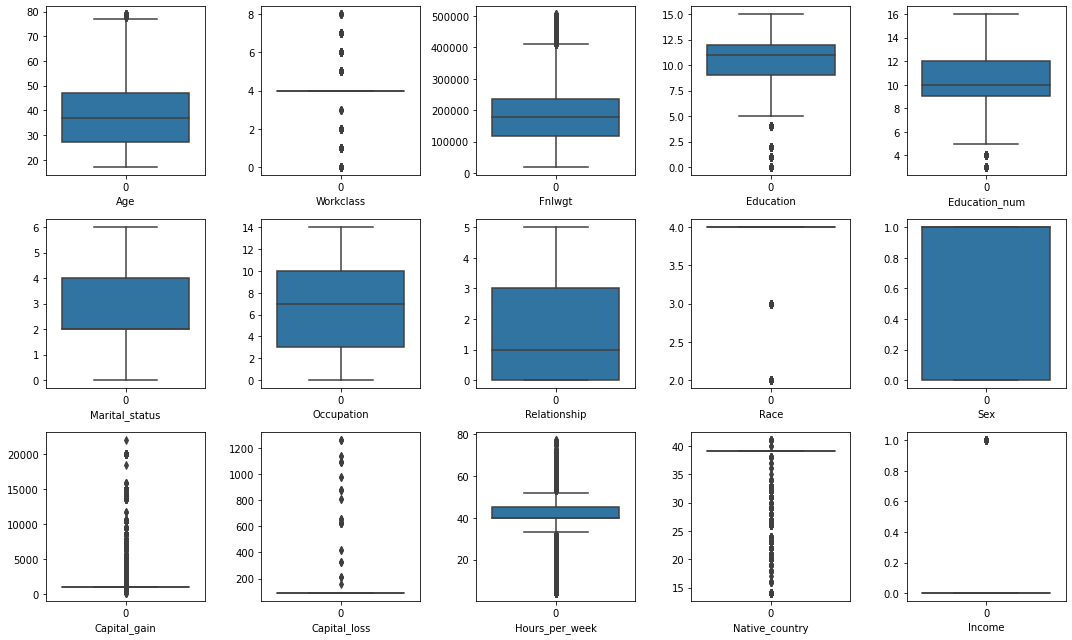

In [89]:
#rechecking for allien-datapoints in each features data which are now stored in df_new
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if graph<=15:
        plt.subplot(3,5,graph)#3,4 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df_new[column])#performing box plots
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

From the above we can see that all outliers have been removed across the features!

# Step 4.4 - Transforming Data to Remove Skewness using Power transformation

In [90]:
#rechecking for skewness...
df_new.skew()

Age                0.483537
Workclass         -0.737658
Fnlwgt             0.627331
Education         -0.957459
Education_num     -0.143317
Marital_status    -0.043793
Occupation         0.130948
Relationship       0.749953
Race              -2.592371
Sex               -0.684100
Capital_gain       5.302199
Capital_loss      30.197888
Hours_per_week    -0.357277
Native_country    -5.466051
Income             1.324408
dtype: float64

- Since we don't apply skewness removal on target data, we need to create a sub data frame that does not include the sales         column

- For the skewness data, only the newspaper column has skewness in its data

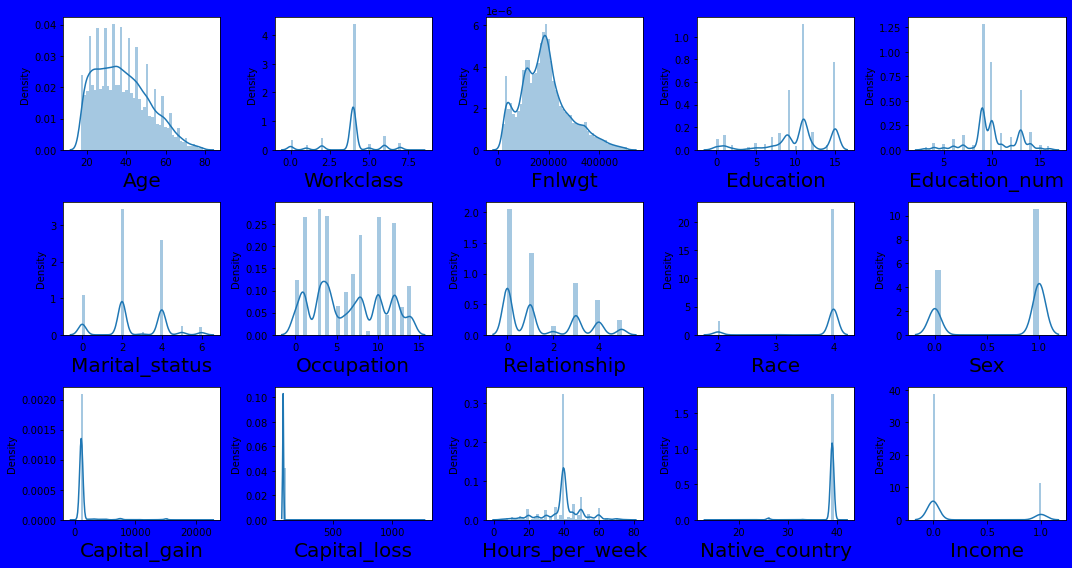

In [91]:
#Visualizing for the current skewness before Power Transformation
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=15:#since there are 6 features
        ax = plt.subplot(3,5,plotnumber)#3,3 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns starting with Length
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

A good Pre-Power Transformation procedure is to ensure that there are no zero values in the data stored in 'cont_features' because from domain knowledge, none of the data values in each features(except Sex column) should be zero!

Let lets go ahead and apply Power Transformation!

In [92]:
#Instantiating PowerTransformer,using 'yeo-johnson',into object 'scaler'
scaler = PowerTransformer(method ='yeo-johnson')#intstantiating using the yeo-johnson
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [93]:
#extracting the columns that are skewed
data=['Capital_gain','Capital_loss']

In [94]:
#Now removing skewness by Power Transformation and updating dataset(df_new) with result
df_new[data] = scaler.fit_transform(df_new[data].values)

In [95]:
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,-0.235598,0.0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,-0.235598,0.0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,-0.235598,0.0,40,39.0,0.0
3,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,-0.235598,0.0,40,39.0,0.0
4,49,4.0,160187,6.0,5,3.0,8.0,1.0,2.0,0.0,-0.235598,0.0,16,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,-0.235598,0.0,38,39.0,0.0
27395,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,-0.235598,0.0,40,39.0,1.0
27396,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,-0.235598,0.0,40,39.0,0.0
27397,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,-0.235598,0.0,20,39.0,0.0


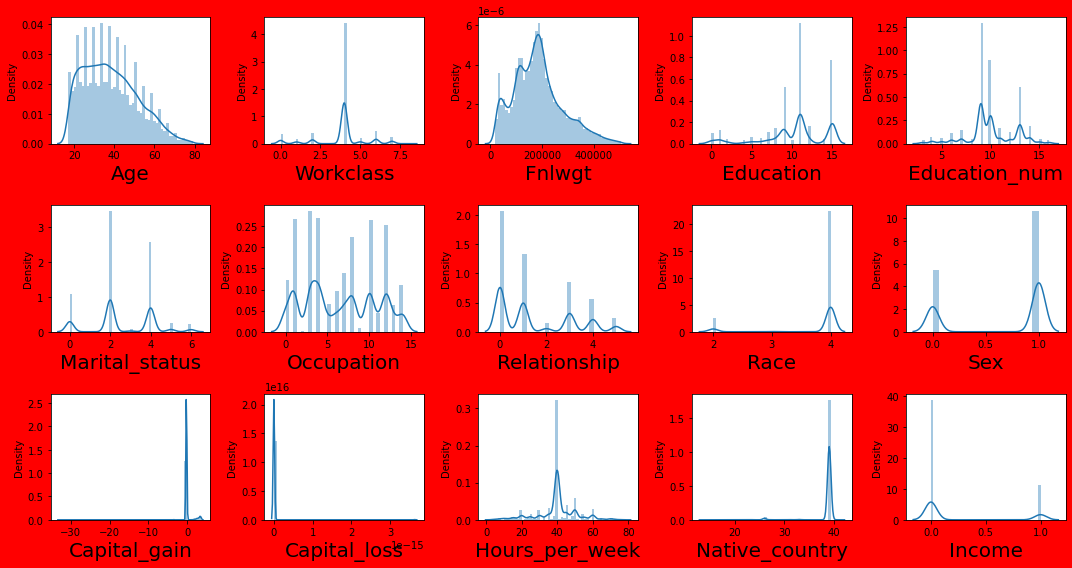

In [96]:
#Visualizing for the current skewness(if any) after Power Transformation
plt.figure(figsize=(15,8), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=15:#since there are 6 features
        ax = plt.subplot(3,5,plotnumber)#3,4 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

In [97]:
#rechecking for skewness
df_new.skew()

Age               0.483537
Workclass        -0.737658
Fnlwgt            0.627331
Education        -0.957459
Education_num    -0.143317
Marital_status   -0.043793
Occupation        0.130948
Relationship      0.749953
Race             -2.592371
Sex              -0.684100
Capital_gain     -5.721618
Capital_loss      0.000000
Hours_per_week   -0.357277
Native_country   -5.466051
Income            1.324408
dtype: float64

From the above you can see all skewness in all continuos data are now within the threshold of +/-0.5 which was chosen earlier!

From the above we can see that skewness has been removed!

NOTE:
- All continuos data columns was considered for skewness removal
- The Income column is not considered for skewness since its the Target data

# Step 4.5 - Seperating the datasets into X and Y variables

In [98]:
#seperation
X=df_new.drop(columns=['Income'])
y=df_new['Income']

0.0    24697
1.0     7839
Name: Income, dtype: int64


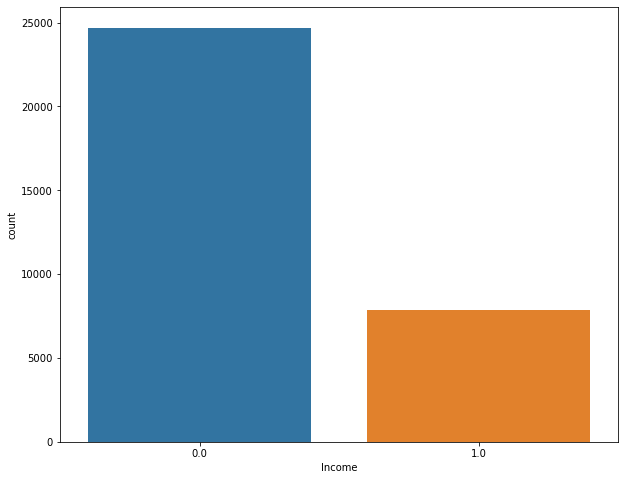

In [99]:
# Remeber we have to deal with imbalanced data in the target data
#Income target/label
# As we can see from the visualisation of the target,the target data is imbalanced.
# We will have to employ some oversampling or undersampling techniques to correct this issue.
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Income',data=df)
print(df['Income'].value_counts())


In [100]:
from imblearn.over_sampling import SMOTE
  


# Transforming data into standard normal distribution

In [101]:
#transforming dataset into a standard normal distribution
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[ 0.88243077,  1.47408098, -1.08626781, ..., -0.0405597 ,
        -2.41305067,  0.1937512 ],
       [-0.01202444,  0.09292873,  0.31008429, ..., -0.0405597 ,
         0.00791966,  0.1937512 ],
       [ 1.10604458,  0.09292873,  0.51135694, ..., -0.0405597 ,
         0.00791966,  0.1937512 ],
       ...,
       [ 1.47873425,  0.09292873, -0.36243543, ..., -0.0405597 ,
         0.00791966,  0.1937512 ],
       [-1.2046314 ,  0.09292873,  0.16071519, ..., -0.0405597 ,
        -1.7853917 ,  0.1937512 ],
       [ 1.03150664,  0.78350485,  1.07276783, ..., -0.0405597 ,
         0.00791966,  0.1937512 ]])

What standard scaler does is to bring mean to zero and standard deviation to 1

In [102]:
#reconfirming that mean is 0
X_Scaled.mean()

-5.551549272061598e-17

In [103]:
#reconfirming that standard deviation is 1
X_Scaled.std()

0.9999999999999999

# Step 5 - MODEL BUILDING

# Step 5.1 - Logistic Regression

# Best Random State

In [150]:
#Using LogisticRegression to get the best Random state and apply SMOTE Oversampling technique
lr=LogisticRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling 
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    lr.fit(x_train_ns,y_train_ns)
    pred_train=lr.predict(x_train_ns)
    pred_test=lr.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0.0: 17002, 1.0: 4917})
The number of classes before fitCounter({0.0: 17002, 1.0: 12751})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  78.7 and 76.7 respectively
The number of classes before fitCounter({0.0: 17046, 1.0: 4873})
The number of classes before fitCounter({0.0: 17046, 1.0: 12784})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  79.9 and 76.5 respectively


The best accuracy is 80.8% at random state 57

We have found best_random state value as 57. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [151]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y,random_state=57,test_size=0.20)

In [152]:
x_train.shape

(21919, 14)

In [153]:
x_test.shape

(5480, 14)

In [154]:
y_train.shape

(21919,)

In [155]:
y_test.shape

(5480,)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [156]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0.0: 17044, 1.0: 4875})
The number of classes after fitCounter({0.0: 17044, 1.0: 12783})


# From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 4875 to 12783.

# So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [157]:
lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
pred_test=lr.predict(x_test)
pred_train=lr.predict(x_train_ns)
Test_Accuracy_lr= (accuracy_score(y_test,pred_test))
Train_Accuracy_lr= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  80.86
Confusion Matrix  [[3512  707]
 [ 342  919]]
Classification Report                precision    recall  f1-score   support

         0.0       0.91      0.83      0.87      4219
         1.0       0.57      0.73      0.64      1261

    accuracy                           0.81      5480
   macro avg       0.74      0.78      0.75      5480
weighted avg       0.83      0.81      0.82      5480



LogisticRegression is producing good accuracy 81.0%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [158]:
#Validation accuracy
vac=cross_val_score(lr,X,y,cv=5)
CV_Score_lr=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_lr)

[0.76478102 0.76094891 0.76642336 0.80054745 0.79448805]
Cross Validation Score is  0.7774377550381484


# Difference between Accuracy Score and Cross Validation Score

In [159]:
Test_Accuracy_lr

0.8085766423357664

In [160]:
CV_Score_lr

0.7774377550381484

In [161]:
lr_Acc_vs_CV_Score=np.abs(Test_Accuracy_lr-CV_Score_lr)
print("Difference between Accuracy and Cross Validation Score = ",lr_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.031138887297618045


From the above you can see that difference between Accuracy and Cross Validation score is low(0.03) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets try ensembling Techniques!

# Step 5.2 - Random Forest Classifier

# Best Random State

In [162]:
#Using RandomForest Classifier to get the best Random state and apply SMOTE Oversampling technique
rf=RandomForestClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    rf.fit(x_train_ns,y_train_ns)
    pred_train=rf.predict(x_train_ns)
    pred_test=rf.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0.0: 17002, 1.0: 4917})
The number of classes before fitCounter({0.0: 17002, 1.0: 12751})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  84.5 and 100.0 respectively
The number of classes before fitCounter({0.0: 17046, 1.0: 4873})
The number of classes before fitCounter({0.0: 17046, 1.0: 12784})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  84.7 and 100.0 respectively


The best accuracy is 86.2% at random state 196

We have found best_random state value as 196. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [163]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y,random_state=196,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [164]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0.0: 16945, 1.0: 4974})
The number of classes after fitCounter({0.0: 16945, 1.0: 12708})


# From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 4974 to 12708.

# So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [165]:
rf=RandomForestClassifier()
rf.fit(x_train_ns,y_train_ns)
pred_test=rf.predict(x_test)
pred_train=rf.predict(x_train_ns)
Test_Accuracy_rf= (accuracy_score(y_test,pred_test))
Train_Accuracy_rf= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  86.04
Confusion Matrix  [[3925  393]
 [ 372  790]]
Classification Report                precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      4318
         1.0       0.67      0.68      0.67      1162

    accuracy                           0.86      5480
   macro avg       0.79      0.79      0.79      5480
weighted avg       0.86      0.86      0.86      5480



Random Forest Classifier is producing average accuracy 86% which is very Good!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [166]:
#Validation accuracy
vac=cross_val_score(rf,X,y,cv=5)
CV_Score_rf=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_rf)

[0.85109489 0.84726277 0.84817518 0.85875912 0.85289286]
Cross Validation Score is  0.8516369668928345


# Difference between Accuracy Score and Cross Validation Score

In [167]:
Test_Accuracy_rf

0.8604014598540146

In [168]:
CV_Score_rf

0.8516369668928345

In [169]:
rf_Acc_vs_CV_Score=np.abs(Test_Accuracy_rf-CV_Score_rf)
print("Difference between Accuracy and Cross Validation Score = ",rf_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.008764492961180093


From the above you can see that difference between Accuracy and Cross Validation score is very low(0.0094) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets build further ensemble Models!

# Step 5.2 - DecisionTree Classifier

# Best Random State and Balancing Target Data(Oversampling)

In [170]:
#Using Decision tree Classifier to get the best Random state and apply SMOTE Oversampling technique
dt=DecisionTreeClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    dt.fit(x_train_ns,y_train_ns)
    pred_train=dt.predict(x_train_ns)
    pred_test=dt.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0.0: 17002, 1.0: 4917})
The number of classes before fitCounter({0.0: 17002, 1.0: 12751})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  80.1 and 100.0 respectively
The number of classes before fitCounter({0.0: 17046, 1.0: 4873})
The number of classes before fitCounter({0.0: 17046, 1.0: 12784})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  80.1 and 100.0 respectively


The best accuracy is 81.4% at random state 65

We have found best_random state value as 65. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [171]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y,random_state=65,test_size=0.20)

In [172]:
x_train.shape

(21919, 14)

In [173]:
x_test.shape

(5480, 14)

In [174]:
y_train.shape

(21919,)

In [175]:
y_test.shape

(5480,)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points. 

In [176]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0.0: 16992, 1.0: 4927})
The number of classes after fitCounter({0.0: 16992, 1.0: 12744})


# From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 4927 to 12744

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [177]:
dt=DecisionTreeClassifier()
dt.fit(x_train_ns,y_train_ns)
pred_test=dt.predict(x_test)
pred_train=dt.predict(x_train_ns)
Test_Accuracy_dt= (accuracy_score(y_test,pred_test))
Train_Accuracy_dt= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  80.36
Confusion Matrix  [[3693  578]
 [ 498  711]]
Classification Report                precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      4271
         1.0       0.55      0.59      0.57      1209

    accuracy                           0.80      5480
   macro avg       0.72      0.73      0.72      5480
weighted avg       0.81      0.80      0.81      5480



Decision Tree is producing average accuracy 80.44% which is very Good!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [178]:
#Validation accuracy
vac=cross_val_score(dt,X,y,cv=5)
CV_Score_dt=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_dt)

[0.80437956 0.80237226 0.80145985 0.81405109 0.80251871]
Cross Validation Score is  0.8049562963032042


# Difference between Accuracy Score and Cross Validation Score

In [179]:
Test_Accuracy_dt

0.8036496350364963

In [180]:
CV_Score_dt

0.8049562963032042

In [181]:
dt_Acc_vs_CV_Score=np.abs(Test_Accuracy_dt-CV_Score_dt)
print("Difference between Accuracy and Cross Validation Score = ",dt_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.0013066612667078648


From the above you can see that difference between Accuracy and Cross Validation score is negligible (0.00375) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.4 - AdaBoost Classifier

# Best Random State and Balancing Data(Oversampling)

In [182]:
#Using AdaBoost Classifier to get the best Random state and apply SMOTE Oversampling technique
ada=AdaBoostClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    ada.fit(x_train_ns,y_train_ns)
    pred_train=ada.predict(x_train_ns)
    pred_test=ada.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0.0: 17002, 1.0: 4917})
The number of classes before fitCounter({0.0: 17002, 1.0: 12751})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  84.0 and 84.6 respectively
The number of classes before fitCounter({0.0: 17046, 1.0: 4873})
The number of classes before fitCounter({0.0: 17046, 1.0: 12784})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  84.1 and 84.4 respectively


The best accuracy is 84.9% at random state 130

We have found best_random state value as 130. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [183]:
#using the random state of 130
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y,random_state=130,test_size=0.20)

In [184]:
# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
# This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [185]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0.0: 16981, 1.0: 4938})
The number of classes after fitCounter({0.0: 16981, 1.0: 12735})


# From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 4938 to 12735.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [186]:
ada=AdaBoostClassifier()
ada.fit(x_train_ns,y_train_ns)
pred_test=ada.predict(x_test)
pred_train=ada.predict(x_train_ns)
Test_Accuracy_ada= (accuracy_score(y_test,pred_test))
Train_Accuracy_ada= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  84.31
Confusion Matrix  [[3686  596]
 [ 264  934]]
Classification Report                precision    recall  f1-score   support

         0.0       0.93      0.86      0.90      4282
         1.0       0.61      0.78      0.68      1198

    accuracy                           0.84      5480
   macro avg       0.77      0.82      0.79      5480
weighted avg       0.86      0.84      0.85      5480



AdaBoostClassifier is producing good accuracy = 84.2%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [187]:
#Validation accuracy
vac=cross_val_score(ada,X,y,cv=5)
CV_Score_ada=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ada)

[0.85419708 0.85620438 0.85930657 0.86423358 0.86439131]
Cross Validation Score is  0.8596665836245359


# Difference between Accuracy Score and Cross Validation Score

In [188]:
Test_Accuracy_ada

0.843065693430657

In [189]:
CV_Score_ada

0.8596665836245359

In [190]:
ada_Acc_vs_CV_Score=np.abs(Test_Accuracy_ada-CV_Score_ada)
print("Difference between Accuracy and Cross Validation Score = ",ada_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.016600890193878892


From the above you can see that difference between Accuracy and Cross Validation score is low (0.0176) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.5 - GradientBoosting Classifier

# Best Random State and Balancing Data(Oversampling)

In [191]:
#Using GradientBoosting Classifier to get the best Random state and apply SMOTE Oversampling technique
gb=GradientBoostingClassifier()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    gb.fit(x_train_ns,y_train_ns)
    pred_train=gb.predict(x_train_ns)
    pred_test=gb.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0.0: 17002, 1.0: 4917})
The number of classes before fitCounter({0.0: 17002, 1.0: 12751})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  84.8 and 86.4 respectively


The best accuracy is 85.4% at random state 161

We have found best_random state value as 161. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [192]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y,random_state=161,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [193]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0.0: 17047, 1.0: 4872})
The number of classes after fitCounter({0.0: 17047, 1.0: 12785})


# From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 4872 to 12785.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [194]:
gb=GradientBoostingClassifier()
gb.fit(x_train_ns,y_train_ns)
pred_test=gb.predict(x_test)
pred_train=gb.predict(x_train_ns)
Test_Accuracy_gb= (accuracy_score(y_test,pred_test))
Train_Accuracy_gb= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  85.31
Confusion Matrix  [[3696  520]
 [ 285  979]]
Classification Report                precision    recall  f1-score   support

         0.0       0.93      0.88      0.90      4216
         1.0       0.65      0.77      0.71      1264

    accuracy                           0.85      5480
   macro avg       0.79      0.83      0.81      5480
weighted avg       0.86      0.85      0.86      5480



GradientBoostingClassifier is producing good accuracy = 84.96%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [195]:
#Validation accuracy
vac=cross_val_score(gb,X,y,cv=5)
CV_Score_gb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_gb)

[0.86058394 0.86313869 0.86459854 0.87116788 0.86439131]
Cross Validation Score is  0.8647760726756306


# Difference between Accuracy Score and Cross Validation Score

In [196]:
Test_Accuracy_gb

0.8531021897810219

In [197]:
CV_Score_gb

0.8647760726756306

In [198]:
gb_Acc_vs_CV_Score=np.abs(Test_Accuracy_gb-CV_Score_gb)
print("Difference between Accuracy and Cross Validation Score = ",gb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.01167388289460869


From the above you can see that difference between Accuracy and Cross Validation score is low (0.015) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.6 - XGBoost Classifier

# Best Random State and Balancing Data(Oversampling)

In [105]:
#Using XGBoost Classifier to get the best Random state and apply SMOTE Oversampling technique
xgb=XGBClassifier()
for i in range(0,3):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    xgb.fit(x_train_ns,y_train_ns)
    pred_train=xgb.predict(x_train_ns)
    pred_test=xgb.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0.0: 17002, 1.0: 4917})
The number of classes before fitCounter({0.0: 17002, 1.0: 12751})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  86.0 and 92.4 respectively
The number of classes before fitCounter({0.0: 17046, 1.0: 4873})
The number of classes before fitCounter({0.0: 17046, 1.0: 12784})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  85.8 and 92.5 respectively
The number of classes before fitCounter({0.0: 17058, 1.0: 4861})
The number of classes before fitCounter({0.0: 17058, 1.0: 12793})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  86.3 and 92.8 respectively


The best accuracy is 86.6% at random state 115

We have found best_random state value as 115. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [200]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y,random_state=115,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

# From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 148 to 639.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [201]:
xgb=XGBClassifier()
xgb.fit(x_train_ns,y_train_ns)
pred_test=xgb.predict(x_test)
pred_train=xgb.predict(x_train_ns)
Test_Accuracy_xgb= (accuracy_score(y_test,pred_test))
Train_Accuracy_xgb= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  89.42
Confusion Matrix  [[3980  304]
 [ 276  920]]
Classification Report                precision    recall  f1-score   support

         0.0       0.94      0.93      0.93      4284
         1.0       0.75      0.77      0.76      1196

    accuracy                           0.89      5480
   macro avg       0.84      0.85      0.85      5480
weighted avg       0.90      0.89      0.89      5480



GradientBoosting is producing good accuracy = 89.96%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [202]:
#Validation accuracy
vac=cross_val_score(xgb,X,y,cv=5)
CV_Score_xgb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_xgb)

[0.85821168 0.86386861 0.86332117 0.87171533 0.86566892]
Cross Validation Score is  0.8645571412013753


# Difference between Accuracy Score and Cross Validation Score

In [203]:
Test_Accuracy_xgb

0.8941605839416058

In [204]:
CV_Score_xgb

0.8645571412013753

In [205]:
xgb_Acc_vs_CV_Score=np.abs(Test_Accuracy_xgb-CV_Score_xgb)
print("Difference between Accuracy and Cross Validation Score = ",xgb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.029603442740230523


From the above you can see that difference between Accuracy and Cross Validation score is low (0.035) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.7 - ExtraTrees Classifier

# Best Random State and Balancing Data(Oversampling)

In [206]:
#Using ExtraTrees Classifier to get the best Random state and apply SMOTE Oversampling technique
ex=ExtraTreesClassifier()
for i in range(0,1):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    ex.fit(x_train_ns,y_train_ns)
    pred_train=ex.predict(x_train_ns)
    pred_test=ex.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0.0: 17002, 1.0: 4917})
The number of classes before fitCounter({0.0: 17002, 1.0: 12751})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  84.3 and 100.0 respectively


The best accuracy is 84.7% at random state 137

We have found best_random state value as 137. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [207]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y,random_state=6,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [208]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0.0: 17003, 1.0: 4916})
The number of classes after fitCounter({0.0: 17003, 1.0: 12752})


# From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 4916 to 12752.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [209]:
ex=ExtraTreesClassifier()
ex.fit(x_train_ns,y_train_ns)
pred_test=ex.predict(x_test)
pred_train=ex.predict(x_train_ns)
Test_Accuracy_ex= (accuracy_score(y_test,pred_test))
Train_Accuracy_ex= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  83.38
Confusion Matrix  [[3817  443]
 [ 468  752]]
Classification Report                precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      4260
         1.0       0.63      0.62      0.62      1220

    accuracy                           0.83      5480
   macro avg       0.76      0.76      0.76      5480
weighted avg       0.83      0.83      0.83      5480



ExtraTreesClassifier is producing good accuracy = 83.78%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [210]:
#Validation of accuracy
vac=cross_val_score(ex,X,y,cv=5)
CV_Score_ex=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ex)

[0.83978102 0.84069343 0.84087591 0.84580292 0.84303705]
Cross Validation Score is  0.8420380670456409


# Difference between Accuracy Score and Cross Validation Score

In [211]:
Test_Accuracy_ex

0.8337591240875912

In [212]:
CV_Score_ex

0.8420380670456409

In [213]:
ex_Acc_vs_CV_Score=np.abs(Test_Accuracy_ex-CV_Score_ex)
print("Difference between Accuracy and Cross Validation Score = ",ex_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.008278942958049651


From the above you can see that difference between Accuracy and Cross Validation score is low (0.00389) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.8 - Support Vector Classifier(SVC)

# Best Random State and Balancing Data(Oversampling)

In [214]:
#Using SVC to get the best Random state and apply SMOTE Oversampling technique
sv=SVC()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    sv.fit(x_train_ns,y_train_ns)
    pred_train=sv.predict(x_train_ns)
    pred_test=sv.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0.0: 17002, 1.0: 4917})
The number of classes before fitCounter({0.0: 17002, 1.0: 12751})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  81.5 and 83.7 respectively


The best accuracy is 81.70% at random state 1

We have found best_random state value as 1. We will now create our tain_test_splitusing this randome_state 

# Creating train_test_split....

In [215]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y,random_state=1,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [228]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0.0: 17046, 1.0: 4873})
The number of classes after fitCounter({0.0: 17046, 1.0: 12784})


# From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 4873 to 12784.

# So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [229]:
sv=GradientBoostingClassifier()
sv.fit(x_train_ns,y_train_ns)
pred_test=sv.predict(x_test)
pred_train=sv.predict(x_train_ns)
Test_Accuracy_sv= (accuracy_score(y_test,pred_test))
Train_Accuracy_sv= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  85.13
Confusion Matrix  [[3701  516]
 [ 299  964]]
Classification Report                precision    recall  f1-score   support

         0.0       0.93      0.88      0.90      4217
         1.0       0.65      0.76      0.70      1263

    accuracy                           0.85      5480
   macro avg       0.79      0.82      0.80      5480
weighted avg       0.86      0.85      0.86      5480



Support Vector is producing good accuracy = 85.11%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [230]:
#Validation accuracy
vac=cross_val_score(sv,X,y,cv=5)
CV_Score_sv=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_sv)

[0.86058394 0.86313869 0.86459854 0.87116788 0.86439131]
Cross Validation Score is  0.8647760726756306


# Difference between Accuracy Score and Cross Validation Score

In [231]:
Test_Accuracy_sv

0.8512773722627737

In [232]:
CV_Score_sv

0.8647760726756306

In [233]:
sv_Acc_vs_CV_Score=np.abs(Test_Accuracy_sv-CV_Score_sv)
print("Difference between Accuracy and Cross Validation Score = ",sv_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.013498700412856945


From the above you can see that difference between Accuracy and Cross Validation score is low (0.01368) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

 Now that we have build 9 models in total lets compare each of them and find the best Model!

# Step 6 - COMPARING ALL MACHINE LEARNING MODELS

Lets create a dataframe that will juxtapose the metrics of all the models...

In [234]:
#Constructing a dataframe...
models = pd.DataFrame({'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boosting Classifier','Gradient Boosting Classifier', 'XgBoost','Extra Trees Classifer','Support Vector Classifier'],'Accuracy_Score' : [Test_Accuracy_lr,Test_Accuracy_dt,Test_Accuracy_rf,Test_Accuracy_ada,Test_Accuracy_gb,Test_Accuracy_xgb,Test_Accuracy_ex,Test_Accuracy_sv],'Cross_Validation_Score':[CV_Score_lr,CV_Score_dt,CV_Score_rf,CV_Score_ada,CV_Score_gb,CV_Score_xgb,CV_Score_ex,CV_Score_sv],'Accuracy_VS_CVScore':[lr_Acc_vs_CV_Score,dt_Acc_vs_CV_Score,rf_Acc_vs_CV_Score,ada_Acc_vs_CV_Score,gb_Acc_vs_CV_Score,xgb_Acc_vs_CV_Score,ex_Acc_vs_CV_Score,sv_Acc_vs_CV_Score]})
models

,Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore
0,Logistic Regression,0.808577,0.777438,0.031139
1,Decision Tree Classifier,0.803650,0.804956,0.001307
2,Random Forest Classifier,0.860401,0.851637,0.008764
3,Ada Boosting Classifier,0.843066,0.859667,0.016601
4,Gradient Boosting Classifier,0.853102,0.864776,0.011674
5,XgBoost,0.894161,0.864557,0.029603
6,Extra Trees Classifer,0.833759,0.842038,0.008279
7,Support Vector Classifier,0.851277,0.864776,0.013499


In [235]:
#Converting Accuracy and Cross_Validation_Score into Percentage....
models["Accuracy_Score"] = (models["Accuracy_Score"] * 100).round(2)
models["Cross_Validation_Score"] = (models["Cross_Validation_Score"] * 100).round(2)
models.sort_values(by = 'Accuracy_Score', ascending = False)
models

,Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore
0,Logistic Regression,80.86,77.74,0.031139
1,Decision Tree Classifier,80.36,80.50,0.001307
2,Random Forest Classifier,86.04,85.16,0.008764
3,Ada Boosting Classifier,84.31,85.97,0.016601
4,Gradient Boosting Classifier,85.31,86.48,0.011674
5,XgBoost,89.42,86.46,0.029603
6,Extra Trees Classifer,83.38,84.20,0.008279
7,Support Vector Classifier,85.13,86.48,0.013499


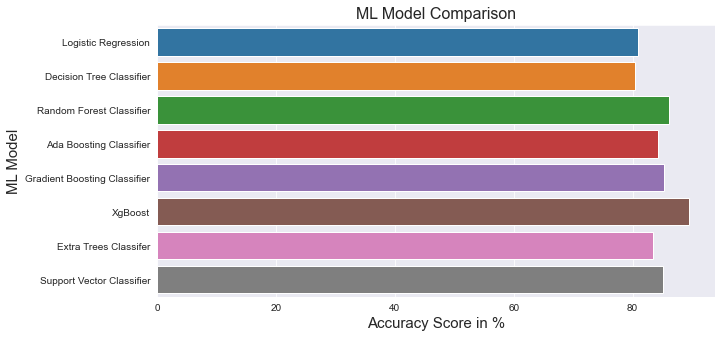

In [236]:
#Now focusing on the Accuracy Score....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_Score', y = 'Model', data = models)

plt.xlabel('Accuracy Score in %', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('ML Model Comparison', fontsize = 16)

plt.show()

Now from the above diagram it seems that XG Boost(89.96%) has the highest Accuracy, However, our aim is to find the BEST MODEL, so lets consider the difference Between Accuracy_Score and Cross_Validation_Score....

# Step 6.1 - Comparing Differences between Accuracy and Cross_Validation Scores...

Lets sort by the column; Accuracy_VS_CVScore to have a good view of the differential between Accuracy_Score and CVScore

In [237]:
#Sorting....
models.sort_values(by = 'Accuracy_VS_CVScore', ascending = True)

,Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore
1,Decision Tree Classifier,80.36,80.50,0.001307
6,Extra Trees Classifer,83.38,84.20,0.008279
2,Random Forest Classifier,86.04,85.16,0.008764
4,Gradient Boosting Classifier,85.31,86.48,0.011674
7,Support Vector Classifier,85.13,86.48,0.013499
3,Ada Boosting Classifier,84.31,85.97,0.016601
5,XgBoost,89.42,86.46,0.029603
0,Logistic Regression,80.86,77.74,0.031139


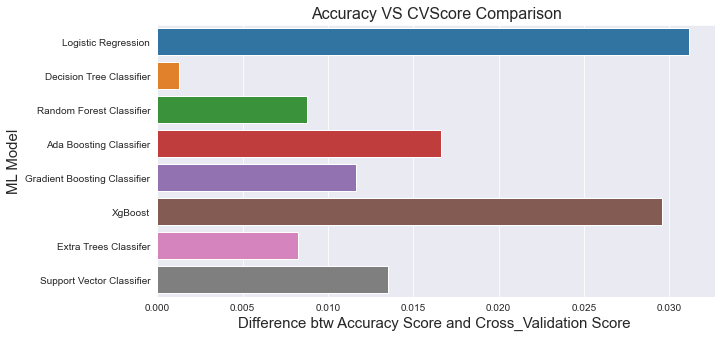

In [238]:
#Now focusing on the differnce btw Accuracy Score and Cross_Validation Scores
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_VS_CVScore', y = 'Model', data = models)

plt.xlabel('Difference btw Accuracy Score and Cross_Validation Score ', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('Accuracy VS CVScore Comparison', fontsize = 16)

plt.show()

From the above we can see the Model with least difference is STILL Decision tree classifier!

# Step 6.2 - Conclusion on Best Choice of Model

From the above we can see:
 - From the above we can see:
 - The Model with least difference is Decision tree classifier

# Hence Optimum Machine Model Chosen = XgBoost CLASSIFIER MODEL!

# Step 7 - HYPERPARAMETER TUNNING
 - Lets prepare list of parameters with options

In [ ]:
parame_grid={'n_estimators':[47,50,60,70],'learning_rate':[0.25,0.30,0.40],'algorithm':['SAMME','SAMME.R'],'random_state':[32,37,57,81,104]}

In [262]:
# Define grid search
grid_search = GridSearchCV(estimator=xgb, 
                           param_grid=param_grid, 
                           scoring="accuracy", 
                           refit='recall', 
                           n_jobs=-1, 
                           cv=2, 
                           verbose=0)# Fit grid search
grid_result = gridsearch.fit(x_train_ns, y_train_ns)# Print grid search summary
grid_result# Print the best score and the corresponding hyperparameters
print(f'The best score is {grid_result.best_score_:.4f}')
print(f'The best hyperparameters are {grid_result.best_params_}')

[13:27:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "algorithm" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:27:18] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "algorithm" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:27:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "algorithm" } might not be used.

  This could b

In [263]:
#Get best hyperparameters
gridsearch.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 0.25,
 'n_estimators': 50,
 'random_state': 32}

In [266]:
#Instantiating using the best parameters...
xgb=XGBClassifier(algorithm='SAMME',learning_rate=0.25,n_estimators=50,random_state=32)

Now lets use the best parameters.....

In [267]:
#fitting the model...
xgb.fit(x_train_ns,y_train_ns)

[13:39:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "algorithm" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(algorithm='SAMME', base_score=0.5, booster='gbtree',
              callbacks=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=32, reg_alpha=0, ...)

In [268]:
pred_test=xgb.predict(x_test)

In [269]:
accuracy_score(y_test,pred_test)

0.8512773722627737

# Step 8 - ROC AUC PLOT

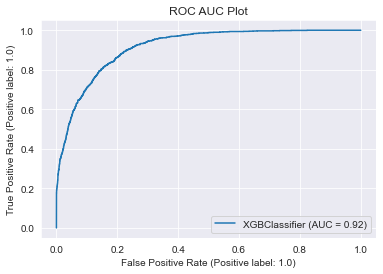

In [270]:
plot_roc_curve(xgb,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

From the above we can see:
- Final Accuracy is 88% and AUC Score is 92% 
- That the AdaBoostClassifier has an AUC close to 1(i.e 0.92)

HENCE WE CAN CONCLUDE OUR MODEL IS PRETTY GOOD!!

# Step 8 - MODEL SAVING

In [106]:
filename='Machine_Model_Project_Census'
pickle.dump(xgb,open(filename,'wb'))